## Zomato Restaurant

### Project Description:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

**Data Storage:**

This problem statement contains two datasets- Zomato.csv and country_code.csv. Country_code.csv contains two variables:

Country code
Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

* `Restaurant Id:` Unique id of every restaurant across various cities of the world
* `Restaurant Name:` Name of the restaurant
* `Country Code:` Country in which restaurant is located
* `City:`  City in which restaurant is located
* `Address:` Address of the restaurant
* `Locality:` Location in the city
* `Locality Verbose:` Detailed description of the locality
* `Longitude:` Longitude coordinate of the restaurant's location
* `Latitude:` Latitude coordinate of the restaurant's location
* `Cuisines:` Cuisines offered by the restaurant
* `Average Cost for two:` Cost for two people in different currencies 
* `Currency:` Currency of the country
* `Has Table booking:` yes/no
* `Has Online delivery:` yes/ no
* `Is delivering:` yes/ no
* `Switch to order menu:` yes/no
* `Price range:` range of price of food
* `Aggregate Rating:` Average rating out of 5
* `Rating color:` depending upon the average rating color
* `Rating text:` text on the basis of rating of rating
* `Votes:` Number of ratings casted by people

Problem statement : In this dataset predict 2 things –

1. Average Cost for two
2. Price range

**Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets**

Dataset Link-  
- https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
- https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

### Importing Necesssary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
######REGRESSION######
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor
#######CLASSIFICATION######
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Loading  datasets

In [8]:
df = pd.read_csv('zomato.csv')


In [9]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [23]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [26]:
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
7393,305570,Aggarwal Sweet Corner,1,New Delhi,"Main Road, Beriwala Bagh, Subhash Nagar, New D...",Subhash Nagar,"Subhash Nagar, New Delhi",77.111166,28.634106,Mithai,100,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,2
2482,18458563,The American Joint,1,Mumbai,"The Ahcl Homes Tower, Chikuwadi New Link Road,...",Borivali West,"Borivali West, Mumbai",72.841347,19.223840,"Healthy Food, American, Burger, Salad",850,Indian Rupees(Rs.),Yes,No,No,No,2,3.4,Orange,Average,170


In [22]:
df1=pd.read_excel('zomato.xlsx')
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


This dataset has 15 rows and 2 columns named country code, country

**Lets merge both the dataset**

Both the dataset has country code as a common variable so we will merge both of this dataset on this column

In [27]:
df=pd.merge(df,df1, on='Country Code',how='left')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [28]:
df.shape

(9551, 22)

After merging both of the dataset we have 9551 rows and 22 columns.

In [29]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [30]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591,Turkey


# Exploratory Data Analysis [EDA]

In [31]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

**Checking for the various data types present in the dataset**


In [32]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

There are 3 types of data present in the dataset `int64`, `object`, `float64`

### Check For Null Values

In [33]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

As we can see here that column `Cuisines` has prescence of 9 null values.

**Visualization of Null Values by heatmap**

<AxesSubplot:>

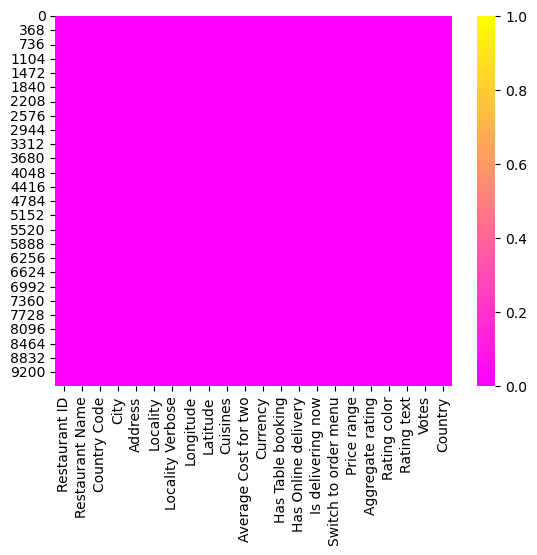

In [34]:
sns.heatmap(df.isnull(),  cmap='spring')

The null value present in the column `Cuisines` is very less that we can't clearly see it on heatmap so we will try another method

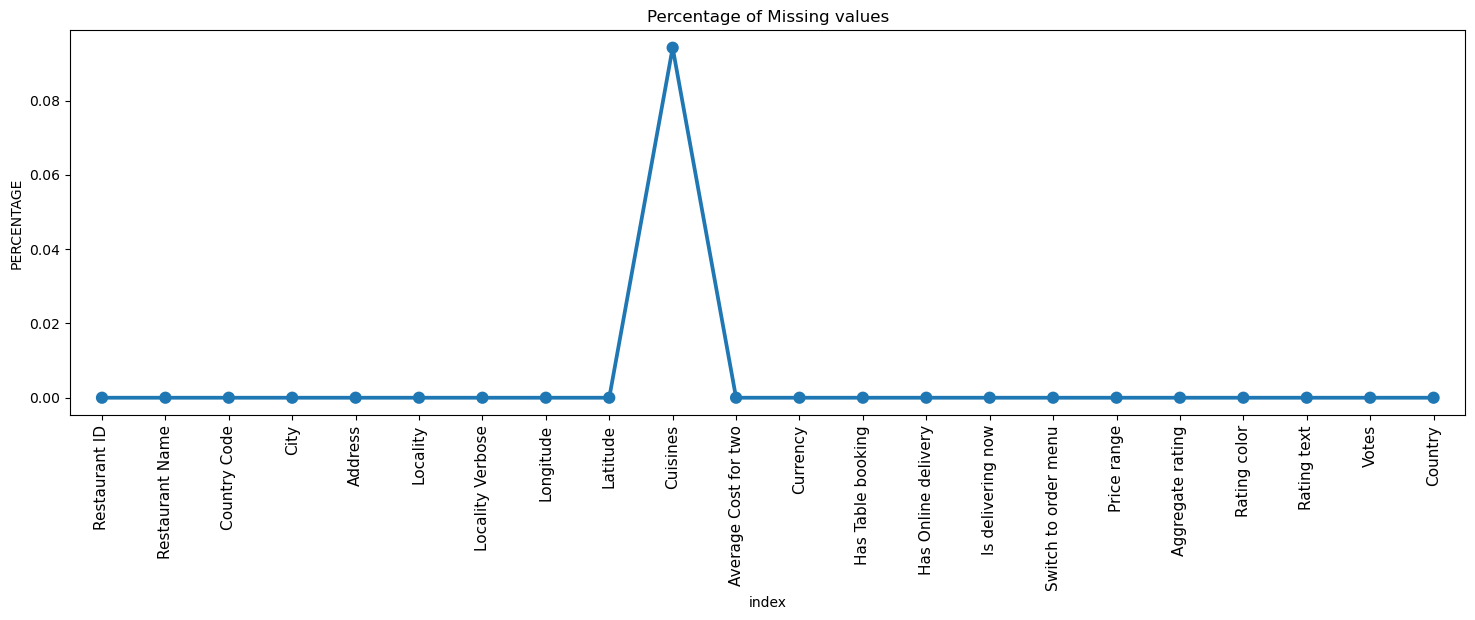

In [35]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(18,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Here we can clearly see that `Cuisines` has prescence of null values.

In [36]:
print(df['Cuisines'].unique())

['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


Here We cannot fill NaN or null Value Like that only by mode because every country have it own dishes which may or may not be provided in another country . So we will fill it with no dishes in nan value place.

In [37]:
df['Cuisines']=df['Cuisines'].fillna("No Cuisines")

**Lets check again that the null values are filled or not**

In [38]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

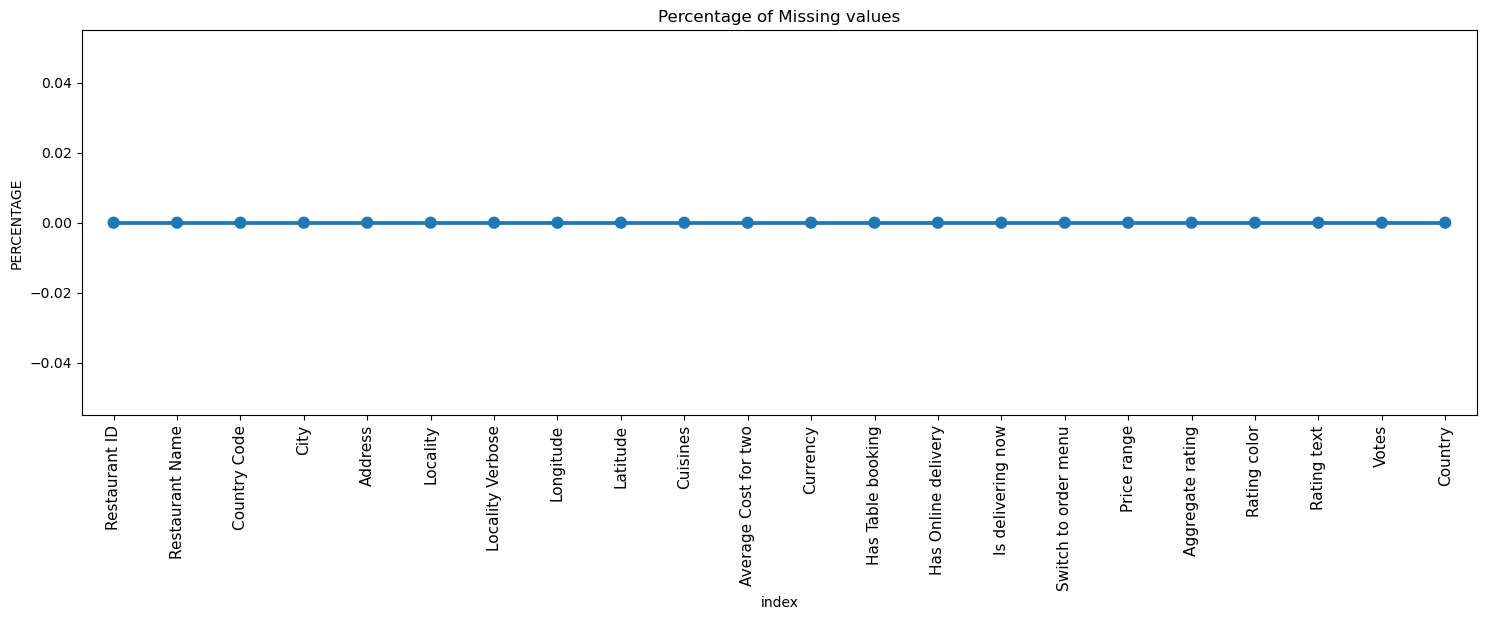

In [39]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(18,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =11)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Here we can see that no null values are present in the dataset

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Here we can get a general information about the dataset like total non-null value count which is same for each column which shows that there are no null values preent in the dataset, we can also see various data types present in the dataset, there are 3 types of the data present `int64` `object` `float64`. we can also observe total number of columns present in the dataset there are total 22 columns present in the dataset & also we can see total memroy occupied by the dataset

**Check for duplicate value**

In [41]:
df.duplicated().sum()

0

As we can see here that there are no duplicated values prescent here.

**Check for white space**

In [42]:
has_white_space=' '  in df
print(has_white_space)

False


There is no white space available in the dataset.

**Check for prescence of various symbols**

In [44]:
df.isin([' ?']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Symbol `?` is not present in the dataset.

In [45]:
df.isin(['@']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Symbol `@` is not present in the dataset.

In [46]:
df.isin(['#']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Symbol `#` is not present in the dataset

**Checking unique values of each column**

In [47]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1826
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

We can observe unique value count for each column present in the dataset & We can observe the columns `Restaurant ID` have 9551 unique values which means they have only one value count. So it is not required for the prediction so we can drop it.

`Switch to order menu` it has only one counts as 'No', and it is not contributing to target variable so we will remove it from the dataset.

In [48]:
df.drop("Switch to order menu",axis=1,inplace=True)

In [49]:
df.drop("Restaurant ID",axis=1,inplace=True)

We can also drop the address column from the dataset as it is not required to know exact address

In [51]:
df.drop("Address",axis=1,inplace=True)

**Check for value count for each column**

In [52]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64



****************************************************************************************************
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64



****************************************************************************************************
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan    

Here we can see the value count for each of the columns seperately present in the dataset.

**Statistical Analysis of Dataset**

In [53]:
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Observations:**

1. count for each of the columns is same which means that there are no null values present in the dataset.

2. In columns `country code`, `Average Cost for two`, `Votes` mean is greater than median which means that skewness is present and data is skewed to the right in this columns.

3. In columns `Longitude`, `Latitude`, `price range`, `Aggregate rating` mean is less than median which means that the data is skewed to the left in this columns.

4. There is a huge difference between 75th percentile and max values so we can say that outliers are present in the dataset.

5. We can also observe std., min., 25th, 50th, 75th, and max values for each of the columns

**Separating categorical column & Numerical column:**

### Categorical columns

In [54]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']


### Numerical columns

In [55]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


**Now we will use group by feature to group the variables which are related to eachother.**

In [56]:
df2 = df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df2

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**Observation:**

By grouping these variables we can understand the realation between Aggregate rating, color and text.

We can say that the following color assigned to the ratings:

* Rating 0 - White - Not rated

* Rating 1.8 to 2.4 - Red - Poor

* Rating 2.5 to 3.4 - Orange - Average

* Rating 3.5 to 3.9 - Yellow - Good

* Rating 4.0 to 4.4 - Green - Very Good

* Rating 4.5 to 4.9 - Dark Green - Excellent


**Now we will check country with no  rating**

In [57]:
No_rating = df[df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Here we can see that india has highest number of restaurents with no rating.

**Country with maximum rating:**

In [58]:
Max_rating = df[df['Rating color']=='Dark Green'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
Max_rating

,Country,Rating Count
0,Australia,1
1,Brazil,16
2,India,116
3,Indonesia,7
4,New Zealand,12
5,Phillipines,12
6,Qatar,4
7,South Africa,12
8,Sri Lanka,2
9,Turkey,10


We can observe that here india is also the country with the highest restaurents ratings.

By this we can conclude that india has highest number of restaurent listed on zomato.

**Now we group the country with their currency:**

In [59]:
country_currency = df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


Here we can see the list of all the countries with their currency.

In [60]:
df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

India has highest number of count of restaurents.

In [61]:
df.City.value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

New delhi has highest number of restaurent listed on zomato & vineland station has least number of restaurent listed on zomato.

**Lets list all the country now and do analysis:**

In [62]:
indiaRestro=df[df['Country']=='India']
singaporeRestro=df[df['Country']=='Singapore']
AusRestro=df[df['Country']=='Australia']
BrazRestro=df[df['Country']=='Brazil']
CanadaRestro=df[df['Country']=='Canada']
UAERestro=df[df['Country']=='UAE']
UKRestro=df[df['Country']=='United Kingdom']
USRestro=df[df['Country']=='United States']
SouthAfricaRestro=df[df['Country']=='South Africa']
NewZelandRestro=df[df['Country']=='New Zealand']
TurkeyRestro=df[df['Country']=='Turkey']
IndonesiaRestro=df[df['Country']=='Indonesia']
QatarRestro=df[df['Country']=='Qatar']
SrilankaRestro=df[df['Country']=='Sri Lanka']

In [63]:
indiaRestro.head()

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,Jahanpanah,1,Agra,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,3,3.9,Yellow,Good,140,India
625,Rangrezz Restaurant,1,Agra,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,2,3.5,Yellow,Good,71,India
626,Time2Eat - Mama Chicken,1,Agra,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,2,3.6,Yellow,Good,94,India
627,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,2,4.0,Green,Very Good,87,India
628,Pinch Of Spice,1,Agra,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,3,4.2,Green,Very Good,177,India


We can see the list of india country restauarant listed on zomato

### Data visualization

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64


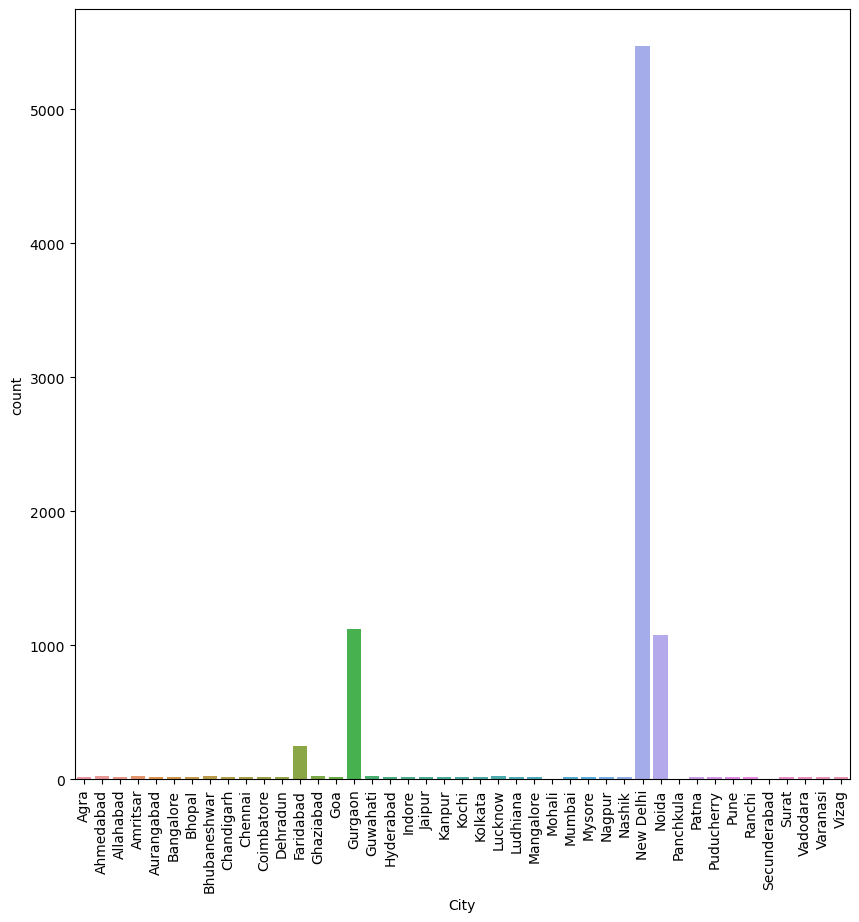

In [64]:
print(indiaRestro.City.value_counts())
plt.figure(figsize=(10,10))
sns.countplot(indiaRestro['City'])
plt.xticks(rotation=90)
plt.show()

In india New delhi has highest number of restaurant and mohali,Panchkula has least number of restaurant.

**Top restaurant in delhi based on the rating and vote count:**

In [65]:
DelhiTopRestro=indiaRestro[(indiaRestro['City']=='New Delhi')&(indiaRestro['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')
DelhiTopRestro

,Aggregate rating,Restaurant Name,Votes
3013,4.9,Naturals Ice Cream,2620
3601,4.9,Indian Accent - The Manor,1934
6659,4.6,The California Boulevard,1691
4639,4.6,Big Chill,1569
6997,4.7,Echoes Satyaniketan,1563
7849,4.6,Cafeteria & Co.,1136
3310,4.6,Spezia Bistro,1071
6657,4.7,Naturals Ice Cream,474
4298,4.9,Masala Library,408
3732,4.6,Tashan,304


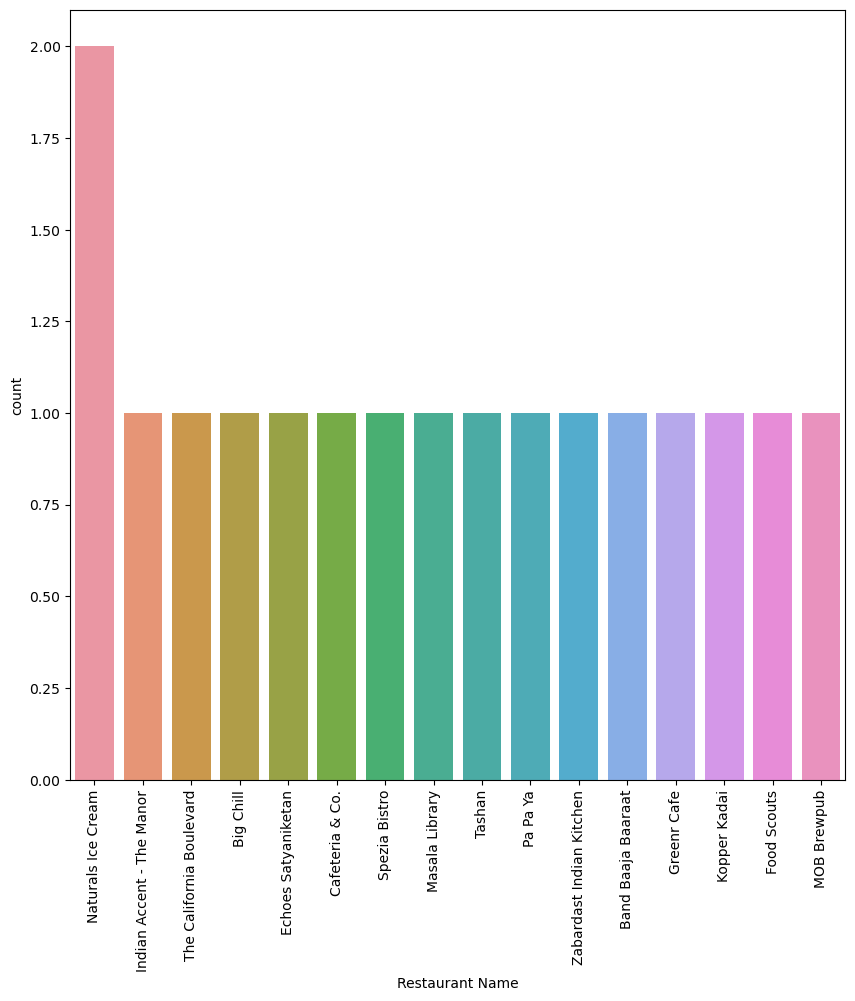

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(DelhiTopRestro['Restaurant Name'])
plt.xticks(rotation=90)
plt.show()

On the basis of Aggregate rating and votes we can see that Naturals Ice Cream has highest rating among all the other restaurant and rest of the restaurant has similar ratings

**New delhi top restaurant with online delivery:**

In [67]:
OnlineDelhitoprestro=indiaRestro[(indiaRestro['City']=='New Delhi')&(indiaRestro['Aggregate rating']>4.5) &(indiaRestro['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending=False,by='Votes')
OnlineDelhitoprestro

,Aggregate rating,Restaurant Name,Votes,Has Online delivery
3013,4.9,Naturals Ice Cream,2620,Yes
3310,4.6,Spezia Bistro,1071,Yes
6657,4.7,Naturals Ice Cream,474,Yes
3014,4.7,Zabardast Indian Kitchen,242,Yes
7180,4.6,Greenr Cafe,112,Yes
6426,4.6,Food Scouts,61,Yes


Here we can see the list of restaurant with online delivery option

<Figure size 1000x1000 with 0 Axes>

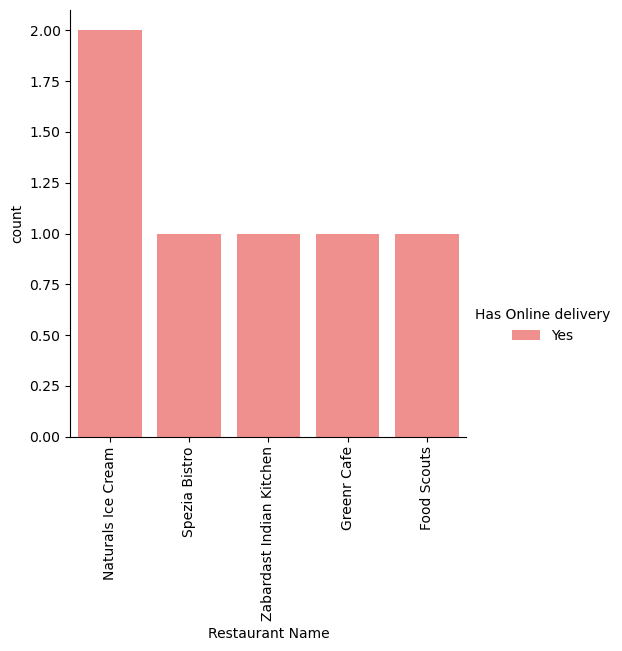

In [68]:
plt.figure(figsize=(10,10))
sns.factorplot('Restaurant Name',kind='count',data=OnlineDelhitoprestro,hue='Has Online delivery',palette="spring")
plt.xticks(rotation=90)
plt.show()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


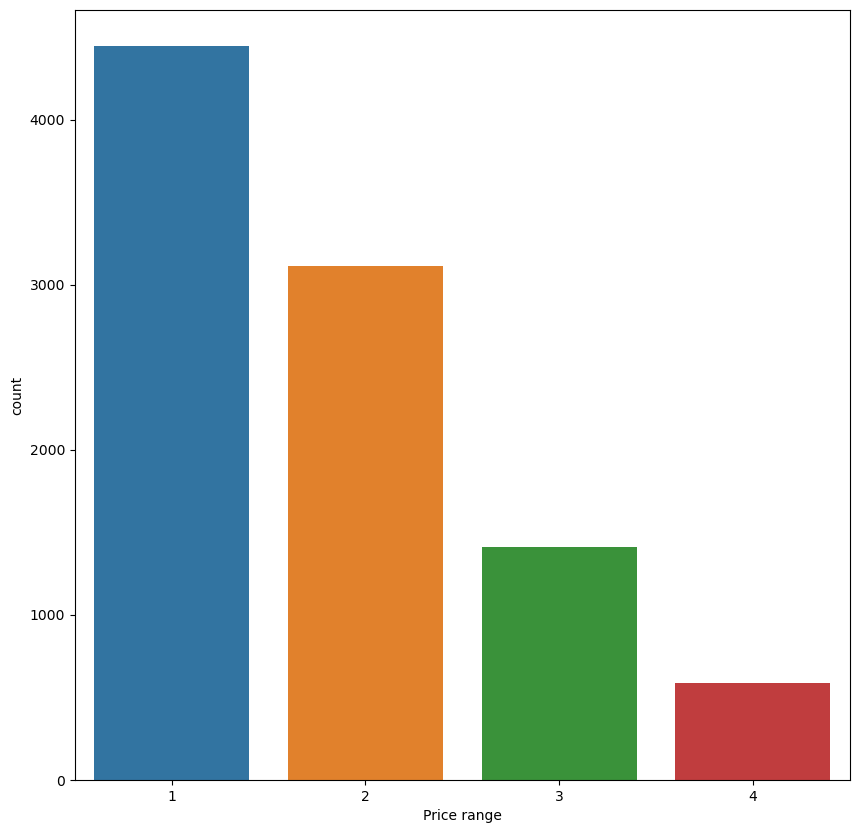

In [69]:
print(df['Price range'].value_counts())


plt.figure(figsize=(10,10))
sns.countplot(df['Price range'])
plt.show()

We can see that price range 1 has maximum count



In [70]:
col1 = ['Has Table booking', 'Has Online delivery', 'Is delivering now','Price range', 'Rating color','Rating text']

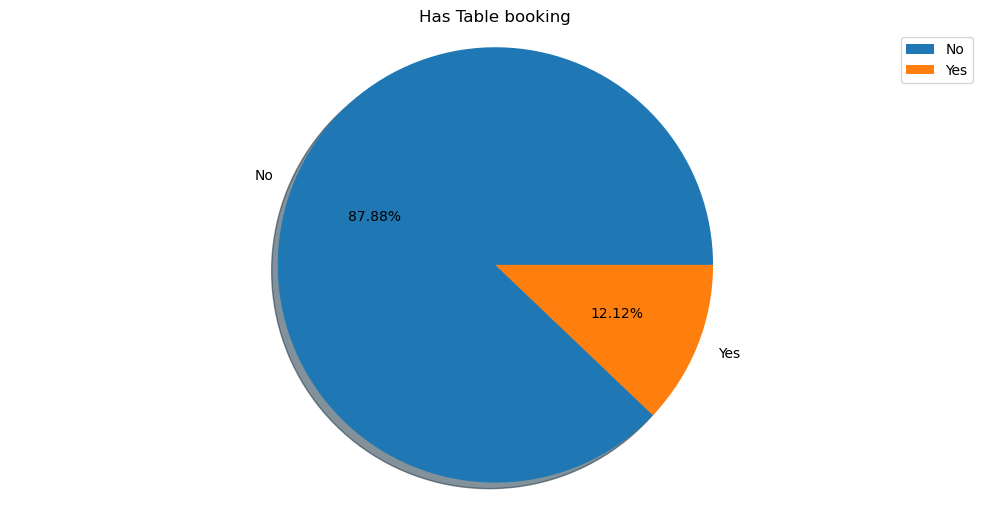




****************************************************************************************************


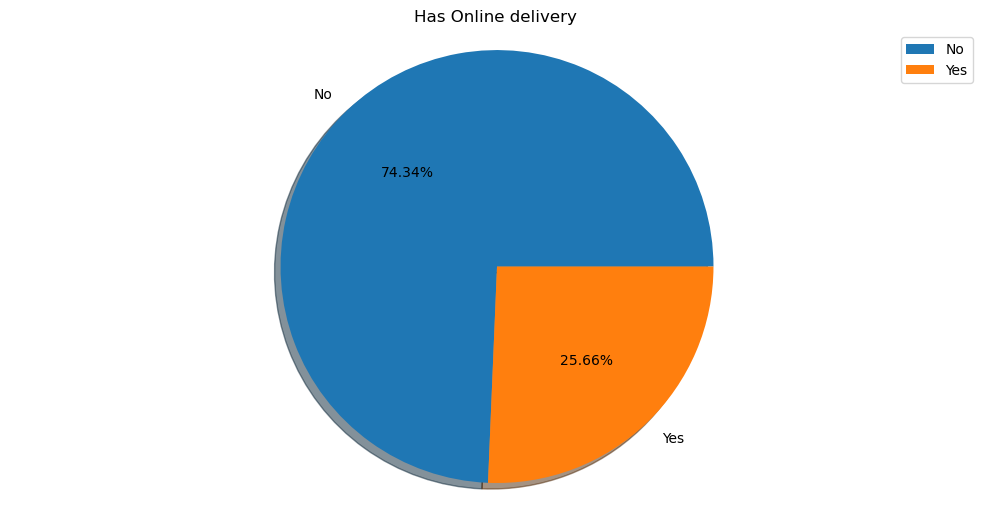




****************************************************************************************************


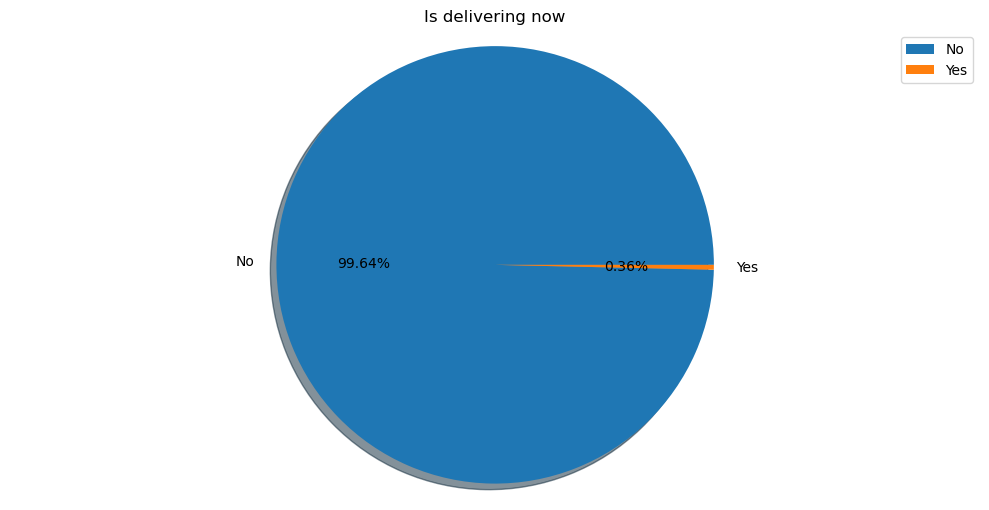




****************************************************************************************************


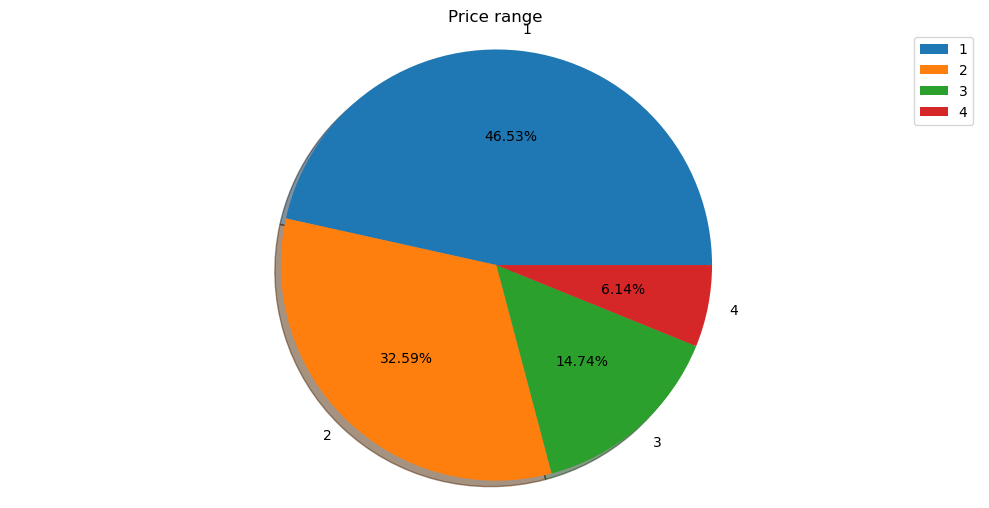




****************************************************************************************************


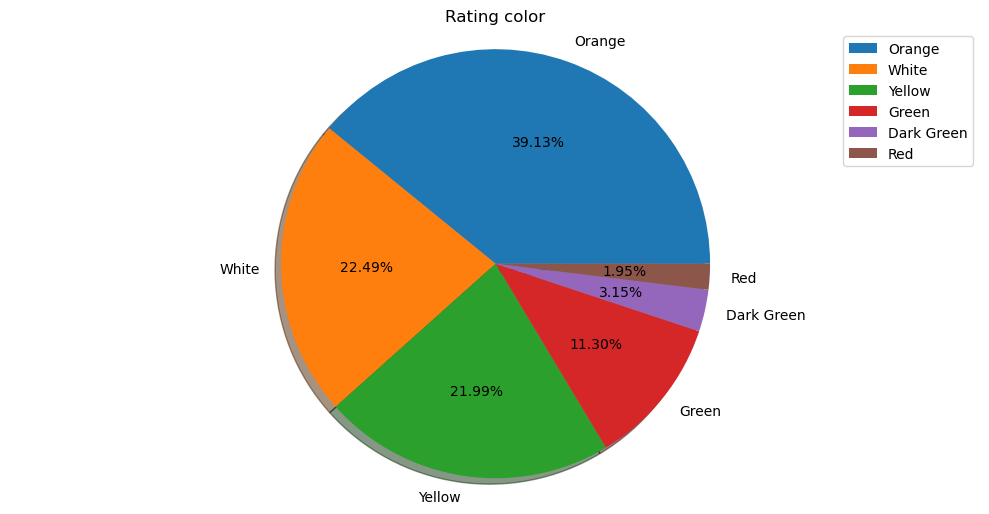




****************************************************************************************************


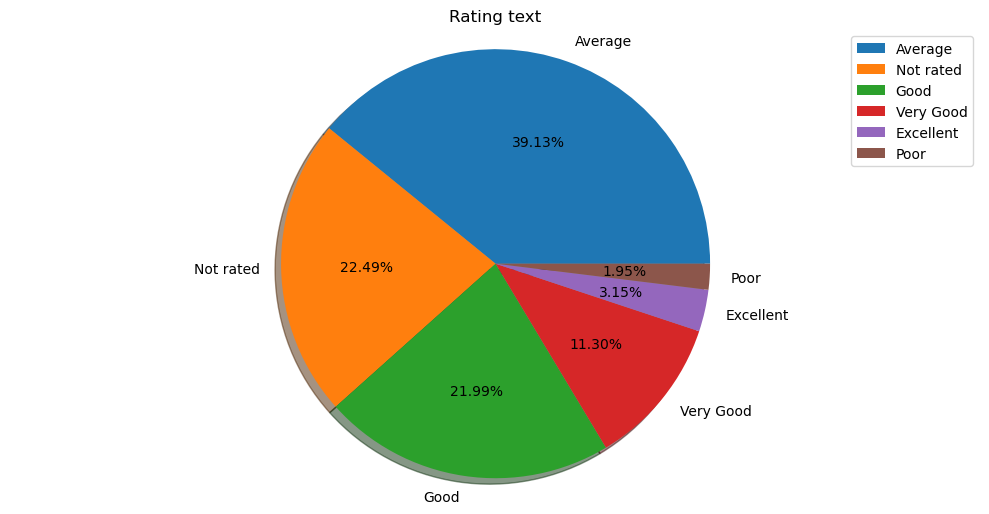




****************************************************************************************************


In [71]:
for i in col1:
        plt.figure(figsize=(10,5),facecolor='white')
        plt.pie(df[i].value_counts().values,labels=df[i].value_counts().index,autopct='%1.2f%%', shadow=True)
        plt.legend(prop={'size':10})
        plt.axis('equal')
        plt.tight_layout()
        plt.title(i)
        plt.show()
        print('\n\n')
        print ('*'*100)


**Observations:**

1. Online Delivery is very less in India.

2. Very less company are delivery now.

3. Maximum price range is 1.

4. Rating color Orange in maximum.

5. Rating Text is maximum Average.

6. Very less restaurant has online table booking option.

**Top cuisines in each region:**

In [72]:
IndianCuisines=df[df['Country']=='India']['Cuisines'].value_counts().head()
IndianCuisines

North Indian             936
North Indian, Chinese    511
Fast Food                348
Chinese                  340
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

<AxesSubplot:ylabel='Cuisines'>

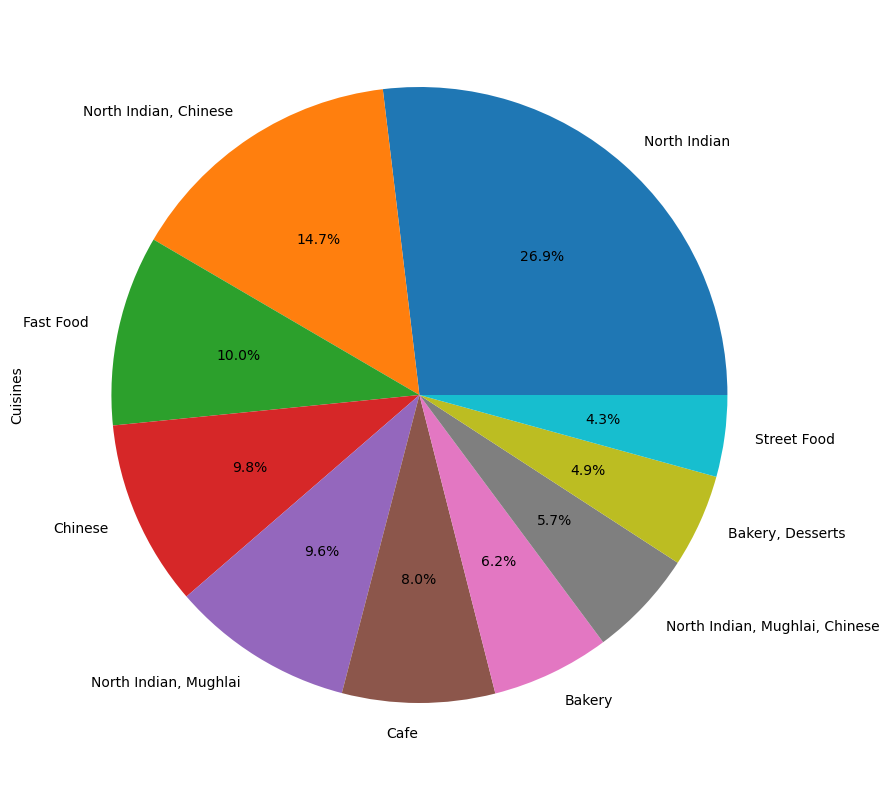

In [73]:
plt.figure(figsize=(10,10))
indiaRestro['Cuisines'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

North Indian dishes are most in counts with 26.9% and the least is street food with 4.3%

['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']



<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two'>

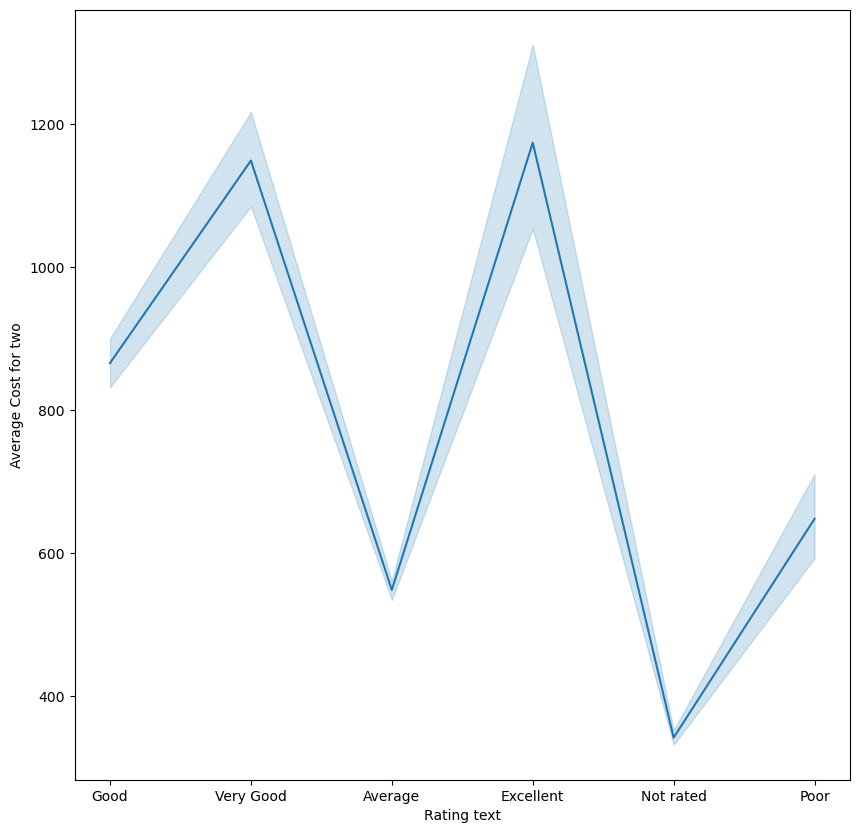

In [74]:
plt.figure(figsize=(10,10))
sns.lineplot(indiaRestro["Rating text"],indiaRestro["Average Cost for two"])

Here we can see that Rating text has affecting the average cost for two If the rating text is "Excellent" the avg. cost for two is high and if there is no rating or "Average" rating in that case Average cost for two is very low.

In [75]:
print(df['Rating text'].unique())
print(df['Rating text'].nunique())
print(df['Rating text'].value_counts())

['Excellent' 'Very Good' 'Good' 'Average' 'Not rated' 'Poor']
6
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64


<AxesSubplot:>

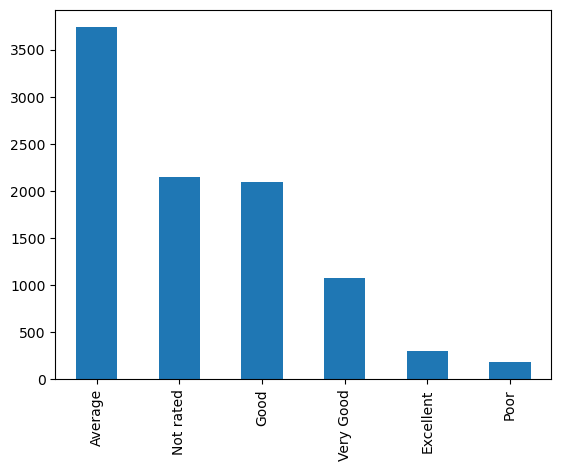

In [76]:
(df['Rating text'].value_counts()[:6]).plot(kind='bar')

Here we can see that maximum rating text is "Average" and minimum is "Poor"

In [77]:
df.groupby('Restaurant Name').mean()['Votes'].sort_values(ascending=False)

Restaurant Name
Toit                               10934.0
Hauz Khas Social                    7931.0
Peter Cat                           7574.0
Big Brewsky                         5705.0
The Black Pearl                     5385.0
                                    ...   
New Bhappe Di Hatti                    0.0
New Aggarwal Sweets & Fast Food        0.0
Nehra's Food Point                     0.0
Negi Restaurant                        0.0
Laxmi Food Corner                      0.0
Name: Votes, Length: 7446, dtype: float64

<AxesSubplot:title={'center':'Out'}, xlabel='Restaurant Name'>

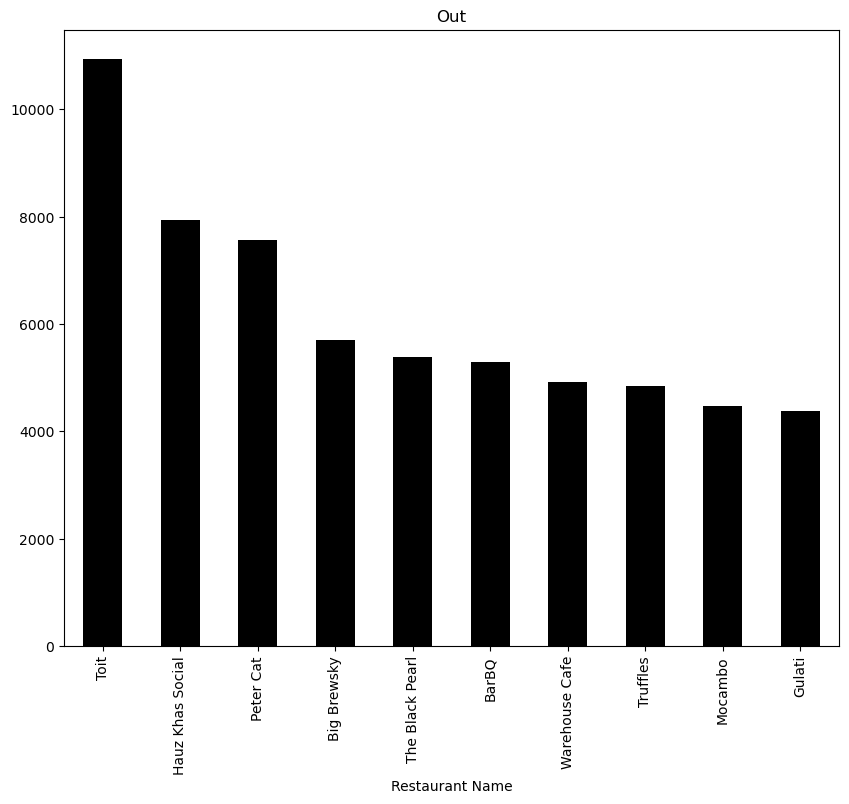

In [82]:
df.groupby('Restaurant Name').mean()['Votes'].sort_values(ascending=False)[:10].plot(kind='bar', color='black', figsize=(10,8), title="Out")

### Multivarient Analysis

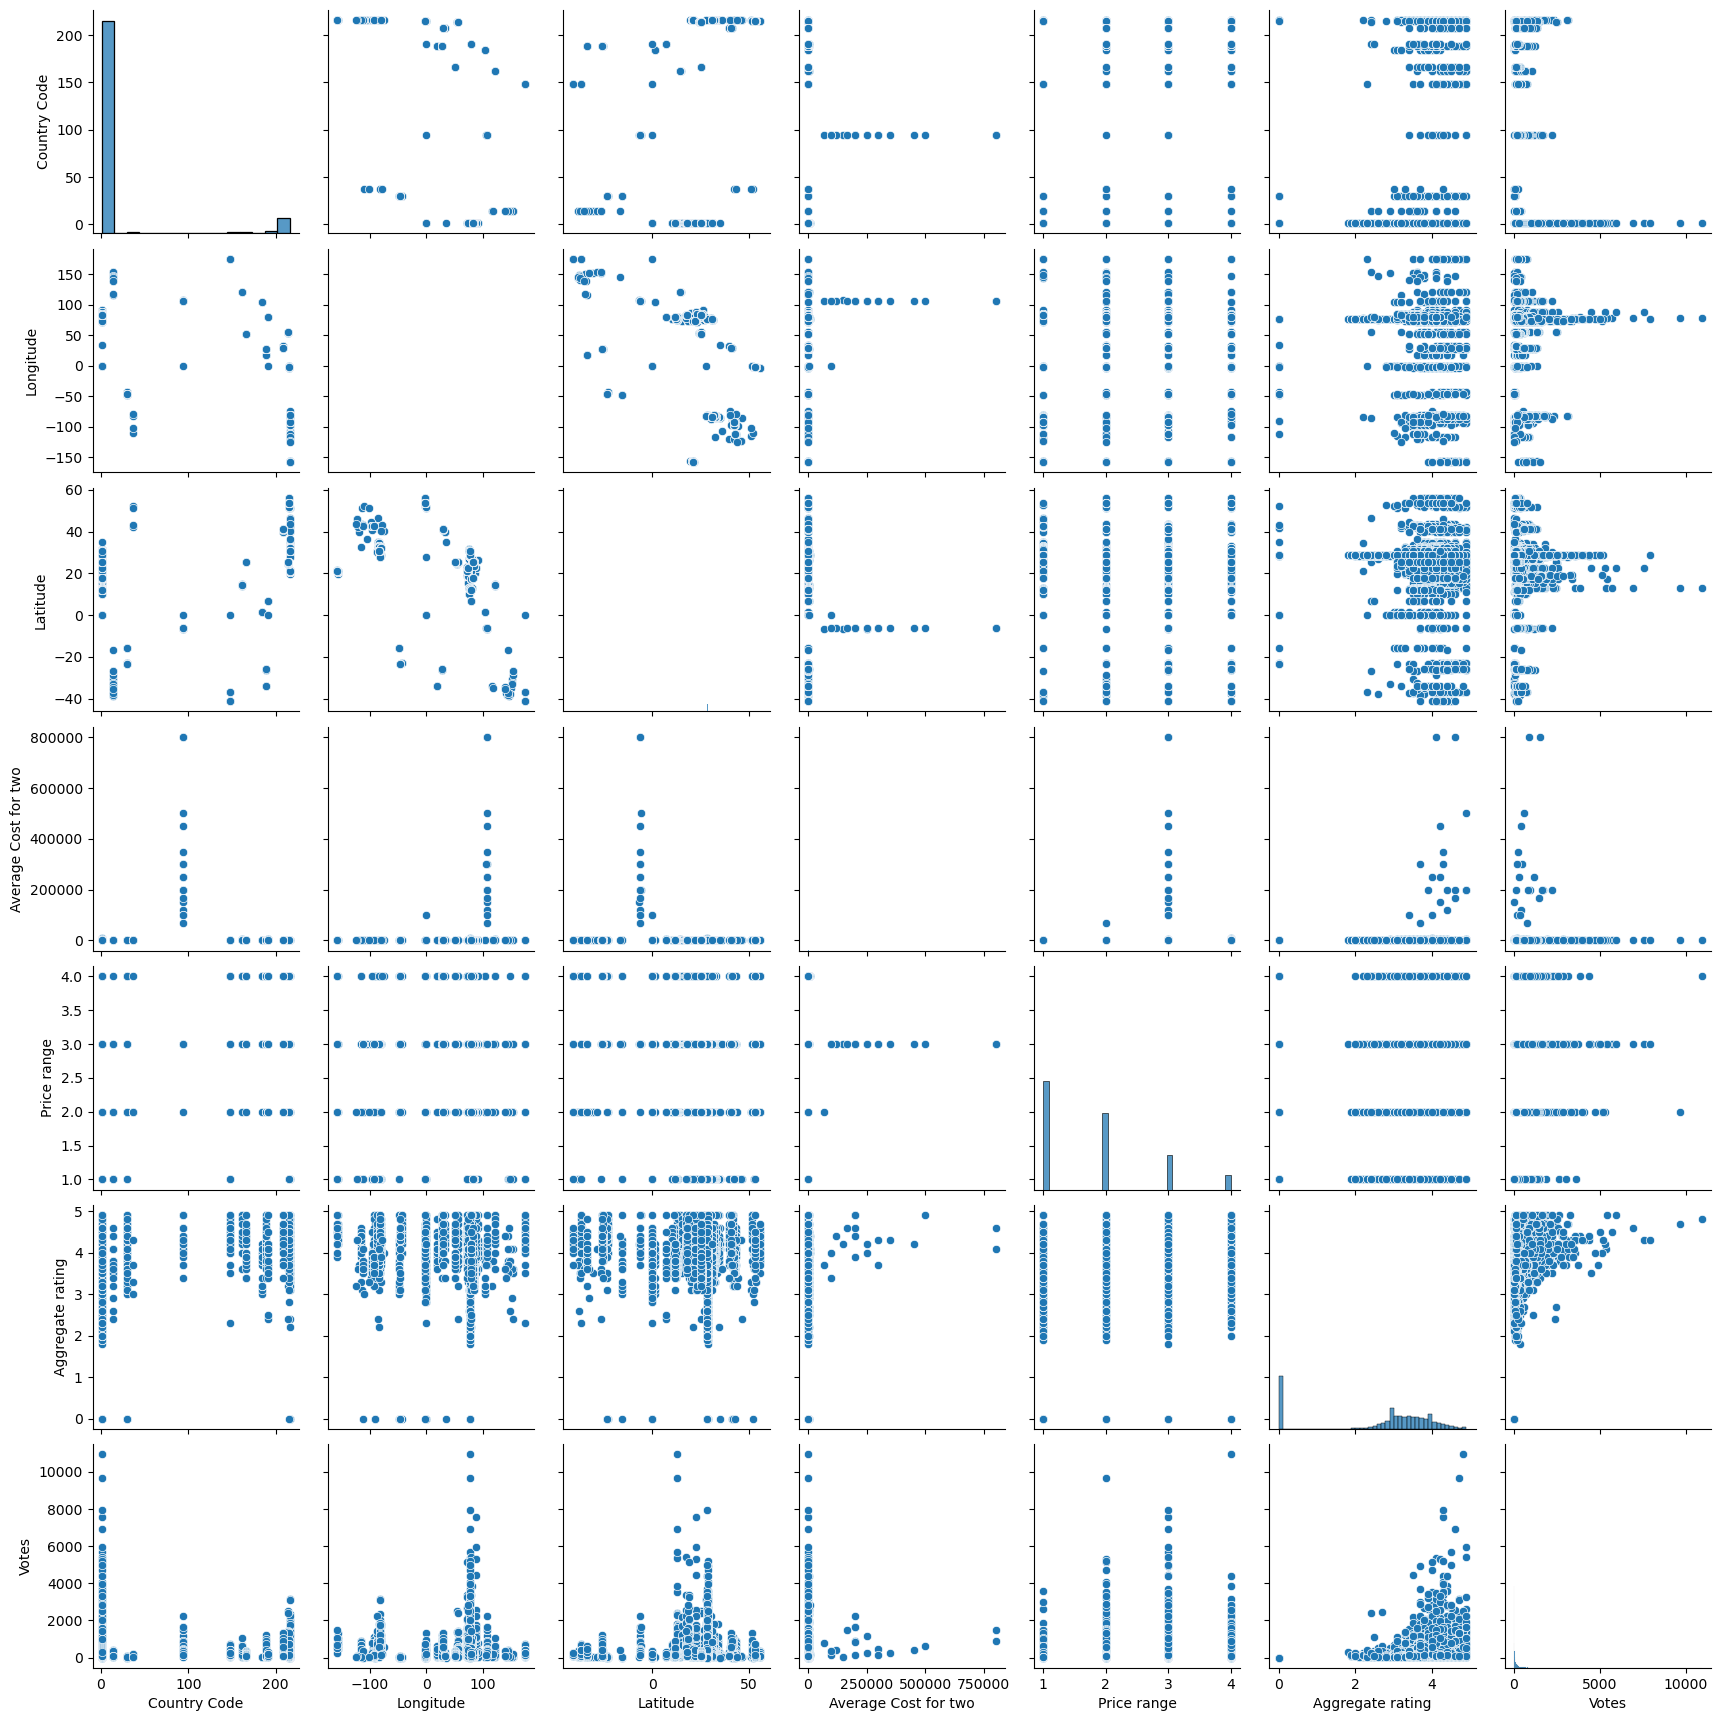

In [83]:
sns.pairplot(df)
plt.show()

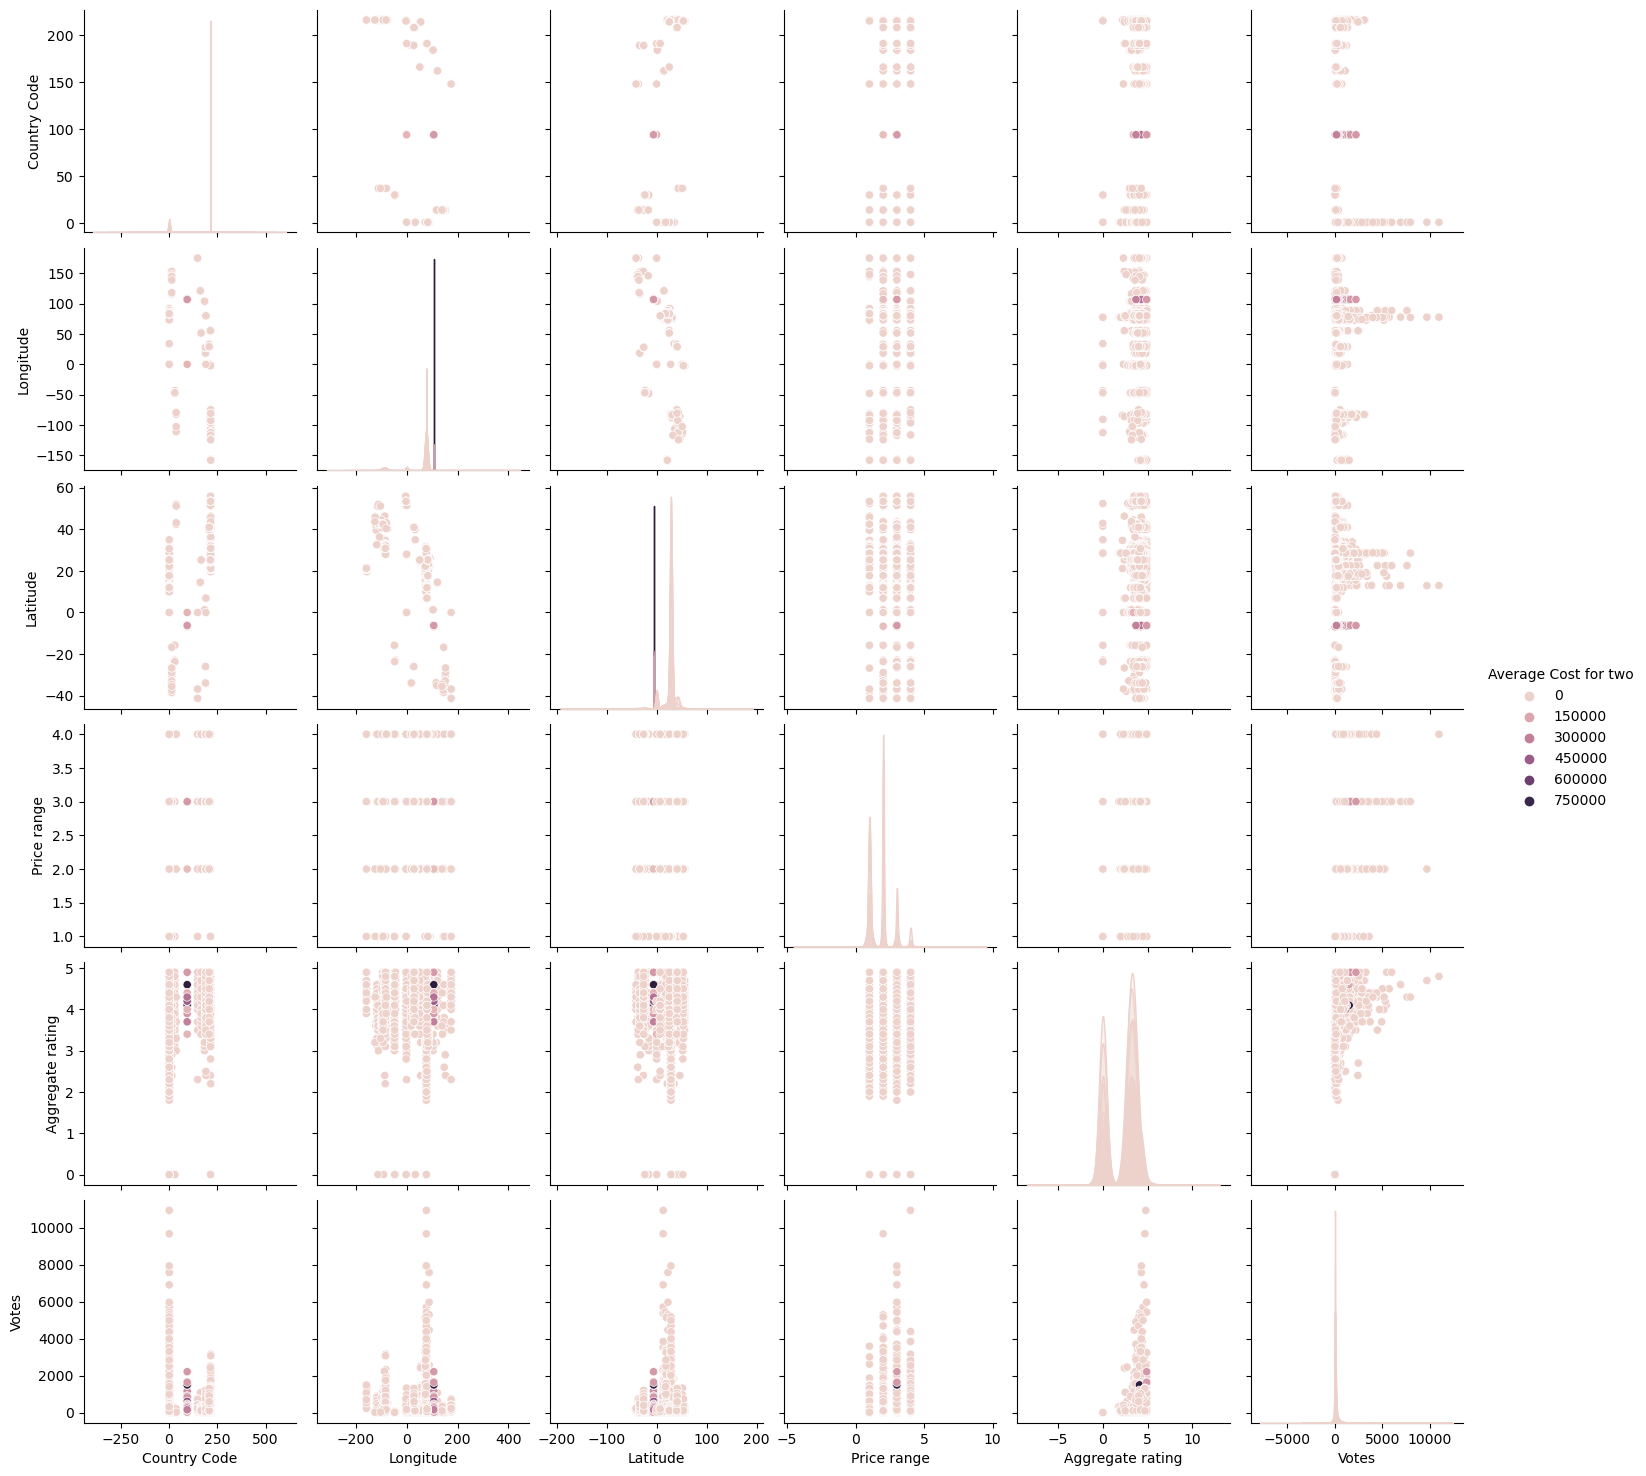

In [84]:
sns.pairplot(df, hue='Average Cost for two')
plt.show()

Here we can see the pair plot of all the different different variables present in the dataset with hue='Average Cost for two

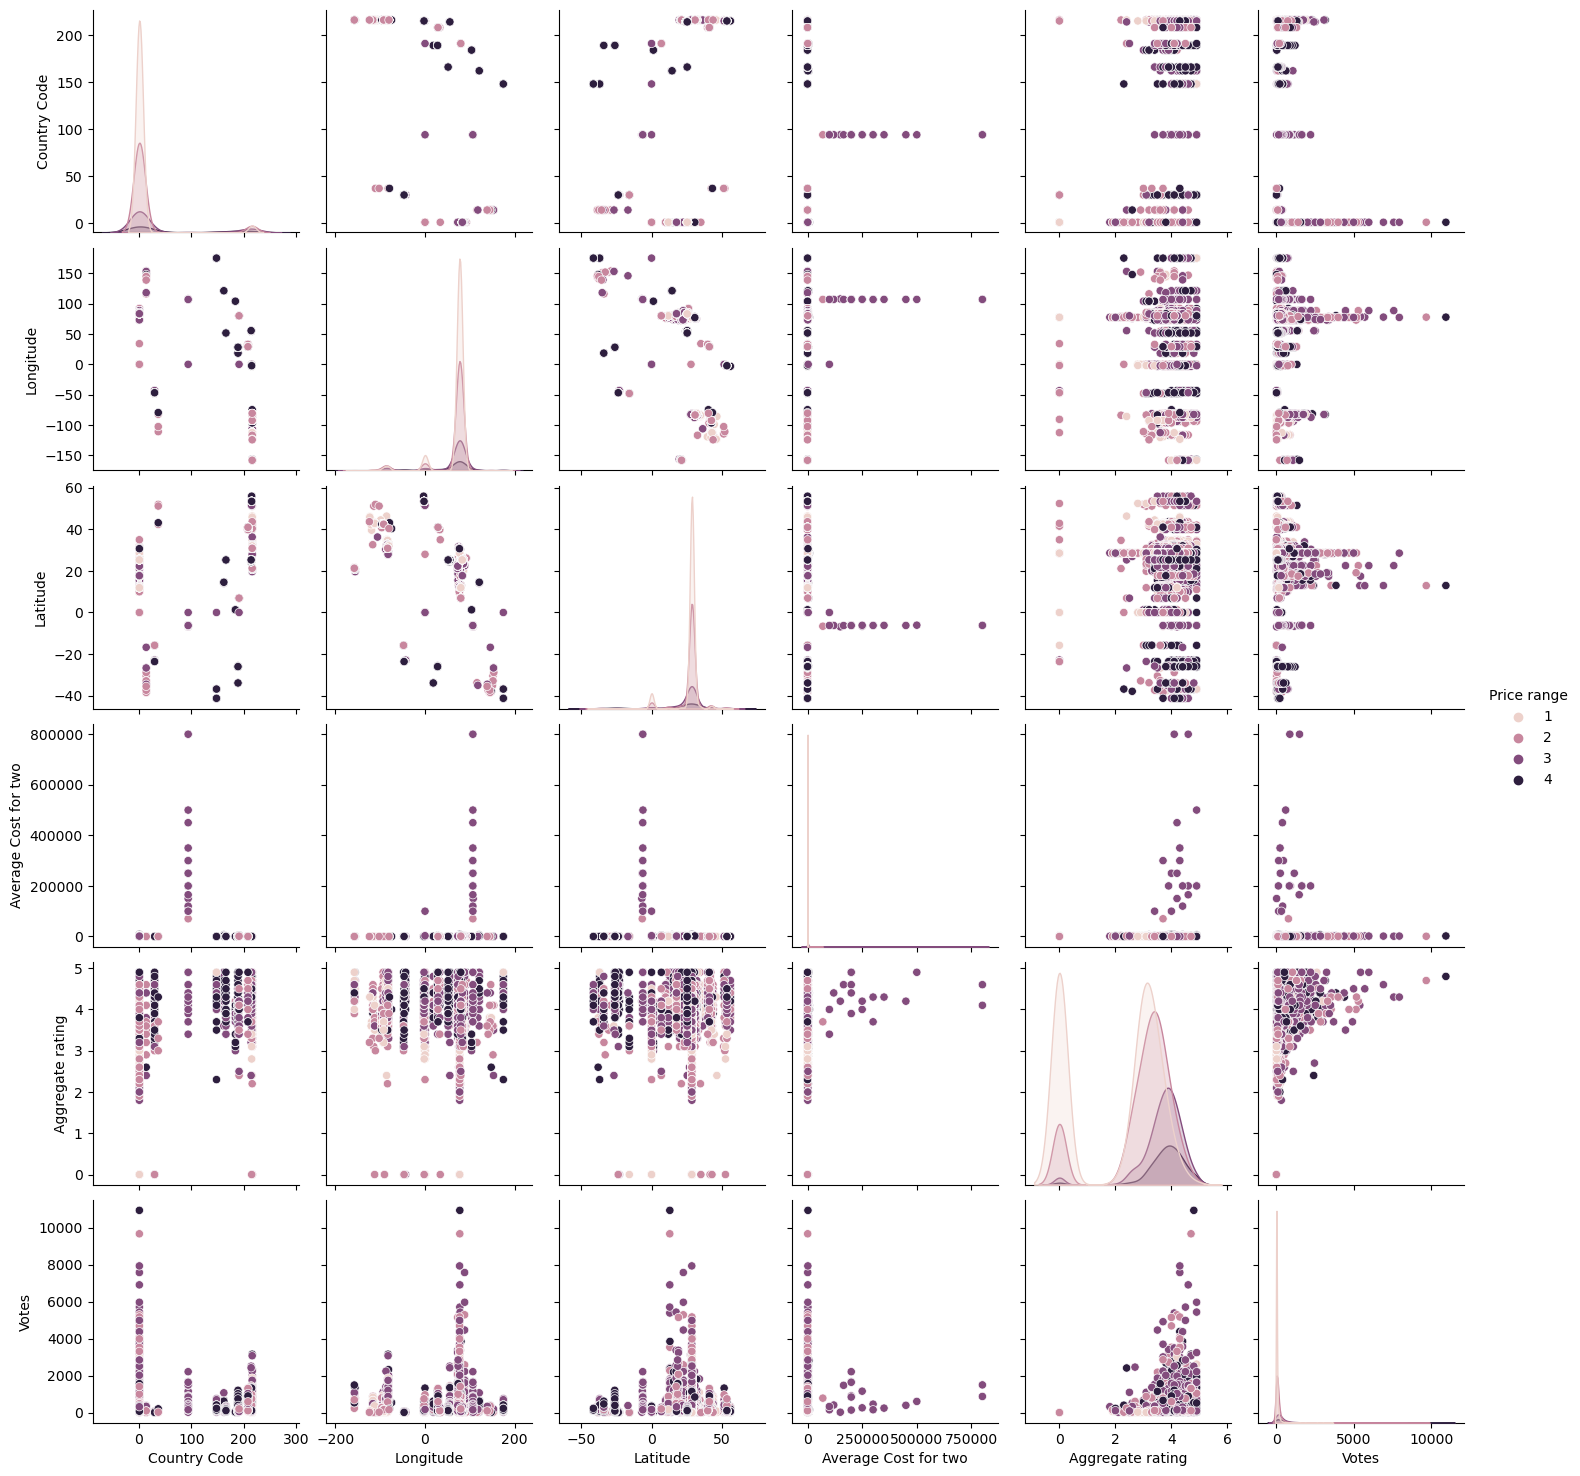

In [85]:
sns.pairplot(df, hue='Price range')
plt.show()

Here we can see the pair plot of all the different different variables present in the dataset with hue='Price range'

### Checking for outliers

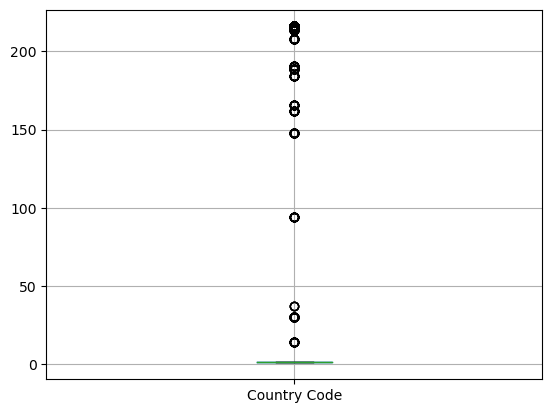

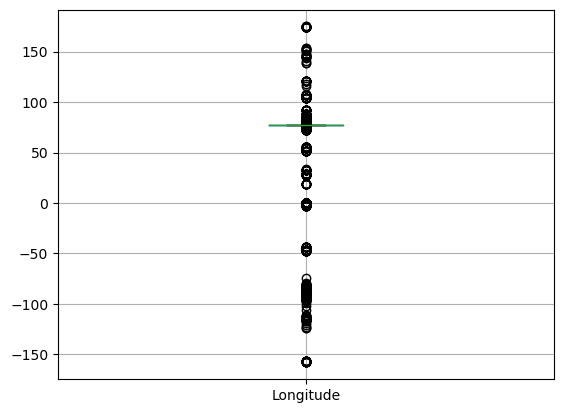

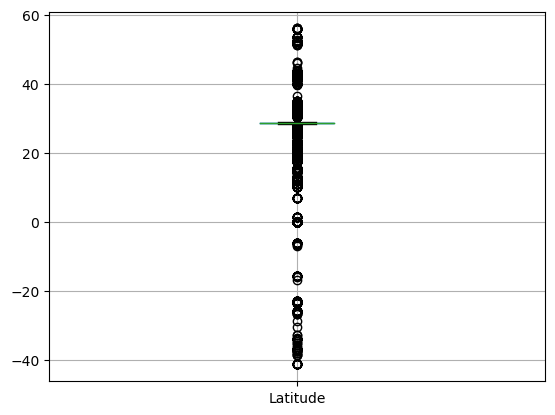

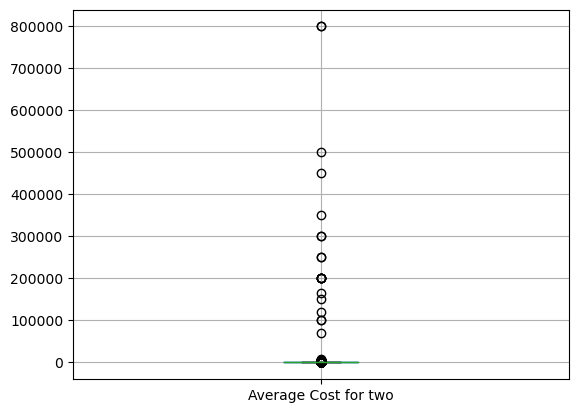

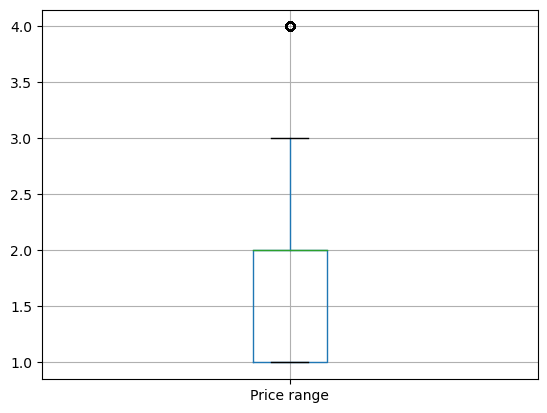

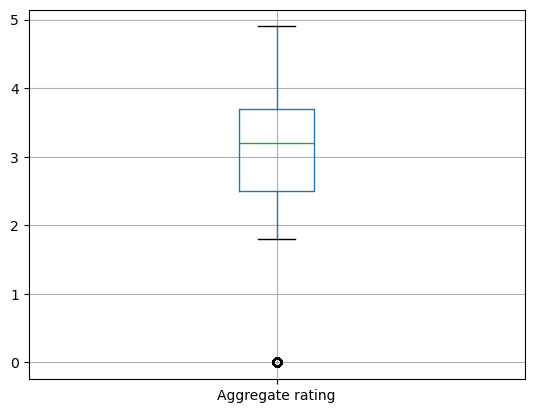

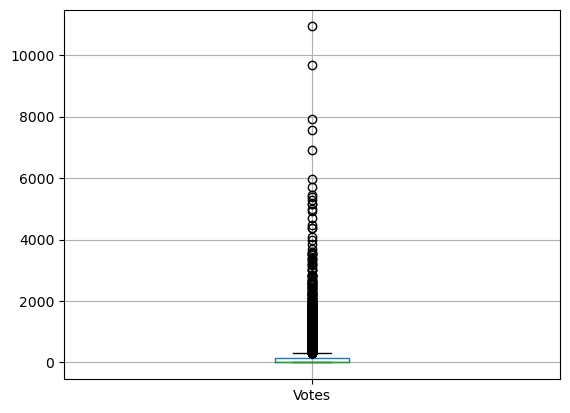

In [86]:
for i in numerical_columns:
    df.boxplot(i)
    plt.show()

We never check prescence of outliers from categorical columns and target variables & to check the prescence of outliers we use boxplot visualization. Here by boxplot visualization we can say that outliers are present in the dataset. so we need to remove the outliers from the dataset.

###  Removing Outliers

In [87]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df[numerical_columns]))

z

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
0,2.531111,1.372269,1.025581,0.006154,1.319803,1.407131,0.365202
1,2.531111,1.371945,1.026647,0.000049,1.319803,1.209281,1.009168
2,2.531111,1.372975,1.024131,0.173743,2.424090,1.143331,0.262911
3,2.531111,1.372966,1.023775,0.018659,2.424090,1.473081,0.483766
4,2.531111,1.372991,1.023854,0.018659,2.424090,1.407131,0.167595
...,...,...,...,...,...,...,...
9546,3.341718,0.847685,1.378025,0.069428,1.319803,0.945480,1.467151
9547,3.341718,0.846144,1.376849,0.067878,1.319803,1.011430,2.039049
9548,3.341718,0.846305,1.381025,0.063845,2.424090,0.681680,1.171903
9549,3.341718,0.846272,1.381221,0.066947,2.424090,0.879530,1.729853


In [88]:
#threshold value =3
threshold=3

print(np.where(z>3))

(array([  22,   23,   24, ..., 9548, 9549, 9550], dtype=int64), array([2, 2, 2, ..., 0, 0, 0], dtype=int64))


In [89]:
df_new=df[(z<3).all(axis=1)]

df_new

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,Eatopia,166,Doha,"The Gate, Dafna","The Gate, Dafna, Doha",51.526653,25.323261,"European, Arabian, Japanese, Bakery, Desserts",200,Qatari Rial(QR),No,No,No,4,3.9,Yellow,Good,197,Qatar
9433,Vine - The St. Regis,166,Doha,"The St. Regis, Westbay","The St. Regis, Westbay, Doha",51.530127,25.350325,International,550,Qatari Rial(QR),No,No,No,4,4.4,Green,Very Good,67,Qatar
9434,Sabai Thai - The Westin Doha Hotel & Spa,166,Doha,"The Westin Doha Hotel & Spa, Fereej Bin Mahmoud","The Westin Doha Hotel & Spa, Fereej Bin Mahmou...",51.512909,25.276180,Thai,445,Qatari Rial(QR),No,No,No,4,4.3,Green,Very Good,73,Qatar
9435,Paper Moon,166,Doha,Umm Ghuwailina,"Umm Ghuwailina, Doha",51.544576,25.273020,Italian,400,Qatari Rial(QR),No,No,No,4,4.5,Dark Green,Excellent,145,Qatar


In [90]:
df_new.shape

(8565, 19)

In [91]:
df.shape

(9551, 19)

In [92]:
DataLoss= ((9551-8565)/9551)*100
print("Data loss is ", DataLoss)

Data loss is  10.323526332321222


Here we can see that the dataloss percentage is approximately 10% which is in accpetable limit so we can further proceed with the dataset.

In [93]:
df=df_new

In [94]:
df.shape

(8565, 19)

**Check for skewness**

In [95]:
df.skew()

Country Code            11.593933
Longitude               -3.529965
Latitude                -3.180873
Average Cost for two     3.718671
Price range              1.029231
Aggregate rating        -0.877262
Votes                    3.653843
dtype: float64

Accpetable range for skewness is -0.5 to +0.5 and according to this we can say that skewness is present in the dataset. we never remove skewness from target column and categorical columns.

Column `country code`, `Longitude`, `Latitude`, `Average cost for two`,`price range`, `Aggrregate rating`, `votes`  have skewness

In [96]:
skew_col=['Country Code','Longitude','Latitude' ,'Price range','Aggregate rating','Votes']

In [97]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [99]:
#Removing skewness using yeo-johnson
df[['Country Code','Longitude','Latitude' ,'Price range','Aggregate rating','Votes']] = PT.fit_transform(df[['Country Code','Longitude','Latitude' ,'Price range','Aggregate rating','Votes']])

In [100]:
df.skew()

Country Code            11.532839
Longitude               -0.249360
Latitude                -2.531937
Average Cost for two     3.718671
Price range              0.240185
Aggregate rating        -0.631024
Votes                   -0.008984
dtype: float64

As we can see here that most of the skewness is removed from the dataset & we can't treat skewnes more further

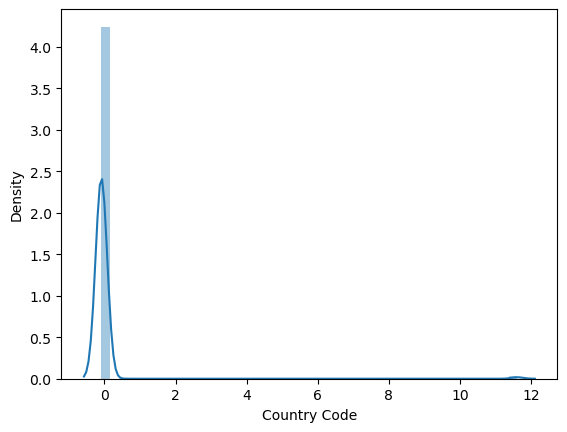

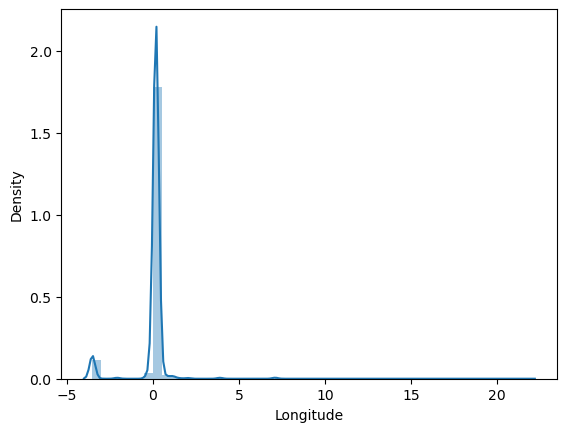

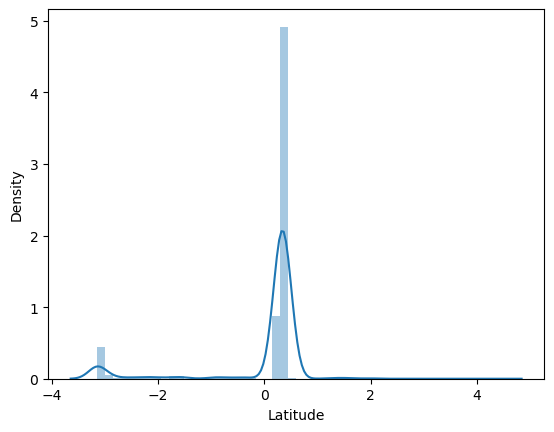

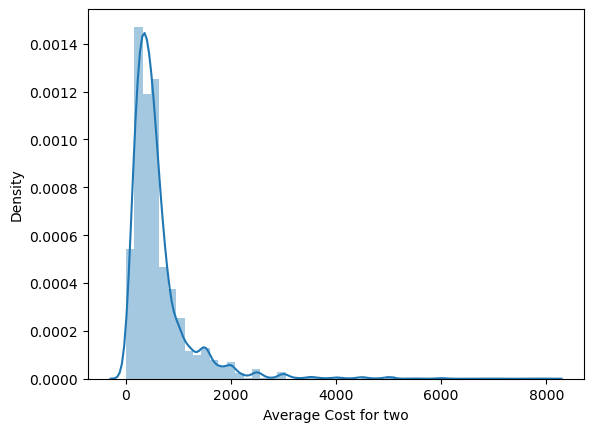

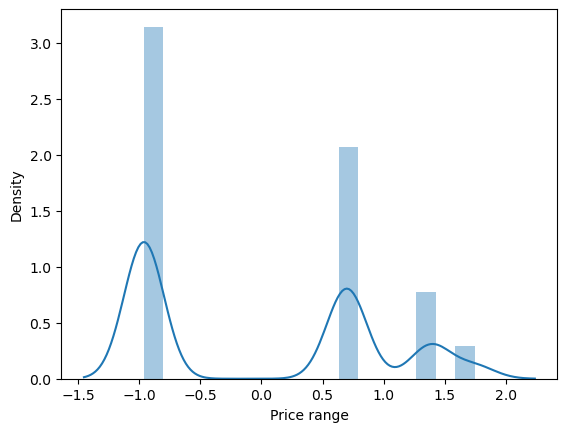

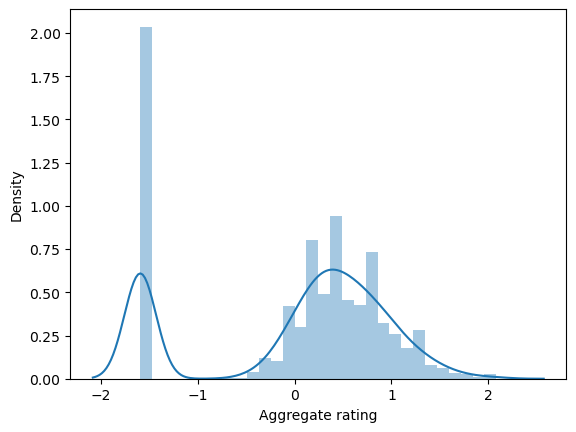

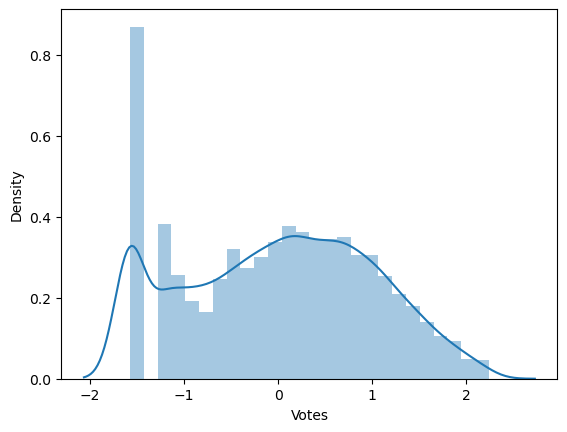

In [101]:
for i in numerical_columns:
    sns.distplot(df[i])
    plt.show()

After visualization with distplot we can see that skewnes is removed from the dataset "Average cost for two" is our target variable so we don't need to remove skewness from there

**Encoding the categorical columns using Label Encoding:**

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,98,99,7.096817,-2.870154,657,1100,0,1,0,0,1.385129,1.972392,0,1,1.410787,2
1,2794,11.616899,27,376,384,7.094048,-2.870996,783,1200,0,1,0,0,1.385129,1.649065,0,1,1.753948,2
2,2550,11.616899,28,185,191,7.102859,-2.869007,1271,4000,0,1,0,0,1.744844,1.543945,1,5,1.329422,2
3,4150,11.616899,28,549,562,7.102785,-2.868725,794,1500,0,0,0,0,1.744844,2.082799,0,1,1.492117,2
4,4878,11.616899,28,549,562,7.102998,-2.868788,793,1500,0,1,0,0,1.744844,1.972392,0,1,1.240914,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1947,11.616899,13,717,770,-2.075973,-0.937919,552,200,4,0,0,0,1.744844,1.038603,5,2,1.160268,3
9433,6352,11.616899,13,736,789,-2.075747,-0.929022,718,550,4,0,0,0,1.744844,1.543945,1,5,0.590036,3
9434,4824,11.616899,13,742,795,-2.076865,-0.953334,1364,445,4,0,0,0,1.744844,1.440165,1,5,0.634827,3
9435,4253,11.616899,13,759,814,-2.074809,-0.954365,719,400,4,0,0,0,1.744844,1.649065,0,1,0.996808,3


In [103]:
df.head( )

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,98,99,7.096817,-2.870154,657,1100,0,1,0,0,1.385129,1.972392,0,1,1.410787,2
1,2794,11.616899,27,376,384,7.094048,-2.870996,783,1200,0,1,0,0,1.385129,1.649065,0,1,1.753948,2
2,2550,11.616899,28,185,191,7.102859,-2.869007,1271,4000,0,1,0,0,1.744844,1.543945,1,5,1.329422,2
3,4150,11.616899,28,549,562,7.102785,-2.868725,794,1500,0,0,0,0,1.744844,2.082799,0,1,1.492117,2
4,4878,11.616899,28,549,562,7.102998,-2.868788,793,1500,0,1,0,0,1.744844,1.972392,0,1,1.240914,2


**Correlation between target variable and independent variables:**

In [104]:
cor=df.corr()
cor

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant Name,1.000000,0.012685,0.008530,0.008658,0.008637,0.019722,0.005493,0.060832,0.051725,0.000797,0.041460,0.031504,0.013050,0.064012,0.028976,-0.007253,0.007538,0.038778,0.007505
Country Code,0.012685,1.000000,0.020689,-0.028893,-0.028208,0.292598,-0.202920,-0.020096,0.010554,-0.210036,0.029633,-0.053197,-0.005434,0.134602,0.103545,-0.069728,0.037943,0.075480,0.960105
City,0.008530,0.020689,1.000000,-0.029670,-0.033822,0.054221,0.081057,0.014873,-0.059545,-0.134651,-0.002165,-0.017478,-0.023878,-0.119901,-0.109620,0.067731,-0.055647,-0.097033,0.030770
Locality,0.008658,-0.028893,-0.029670,1.000000,0.999002,-0.026209,0.017092,-0.015087,-0.041655,-0.010129,-0.070155,-0.049229,-0.011218,-0.101930,-0.155147,0.006835,-0.000465,-0.178258,-0.031437
Locality Verbose,0.008637,-0.028208,-0.033822,0.999002,1.000000,-0.027072,0.016162,-0.016232,-0.038586,-0.008717,-0.069131,-0.049567,-0.011166,-0.099217,-0.153900,0.007440,0.001245,-0.176254,-0.030599
Longitude,0.019722,0.292598,0.054221,-0.026209,-0.027072,1.000000,0.579900,0.004392,0.073071,-0.354945,0.079615,0.105109,0.011096,0.075264,0.175121,-0.104827,-0.077165,0.186750,0.232608
Latitude,0.005493,-0.202920,0.081057,0.017092,0.016162,0.579900,1.000000,0.038402,-0.012364,0.116663,0.050272,0.160799,0.022612,-0.112352,-0.027884,-0.006377,-0.185071,-0.018102,-0.196182
Cuisines,0.060832,-0.020096,0.014873,-0.015087,-0.016232,0.004392,0.038402,1.000000,0.006327,0.029270,0.039859,-0.039823,0.005151,0.027467,-0.056096,-0.047689,-0.061127,-0.029703,-0.021027
Average Cost for two,0.051725,0.010554,-0.059545,-0.041655,-0.038586,0.073071,-0.012364,0.006327,1.000000,-0.067872,0.617051,0.062763,0.009316,0.699506,0.350264,-0.033294,0.095707,0.424192,-0.012355
Currency,0.000797,-0.210036,-0.134651,-0.010129,-0.008717,-0.354945,0.116663,0.029270,-0.067872,1.000000,-0.055098,0.011173,0.001141,-0.025634,-0.028879,0.042093,-0.000150,-0.022035,-0.139876


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'Restaurant Name'),
  Text(0, 1.5, 'Country Code'),
  Text(0, 2.5, 'City'),
  Text(0, 3.5, 'Locality'),
  Text(0, 4.5, 'Locality Verbose'),
  Text(0, 5.5, 'Longitude'),
  Text(0, 6.5, 'Latitude'),
  Text(0, 7.5, 'Cuisines'),
  Text(0, 8.5, 'Average Cost for two'),
  Text(0, 9.5, 'Currency'),
  Text(0, 10.5, 'Has Table booking'),
  Text(0, 11.5, 'Has Online delivery'),
  Text(0, 12.5, 'Is delivering now'),
  Text(0, 13.5, 'Price range'),
  Text(0, 14.5, 'Aggregate rating'),
  Text(0, 15.5, 'Rating color'),
  Text(0, 16.5, 'Rating text'),
  Text(0, 17.5, 'Votes'),
  Text(0, 18.5, 'Country')])

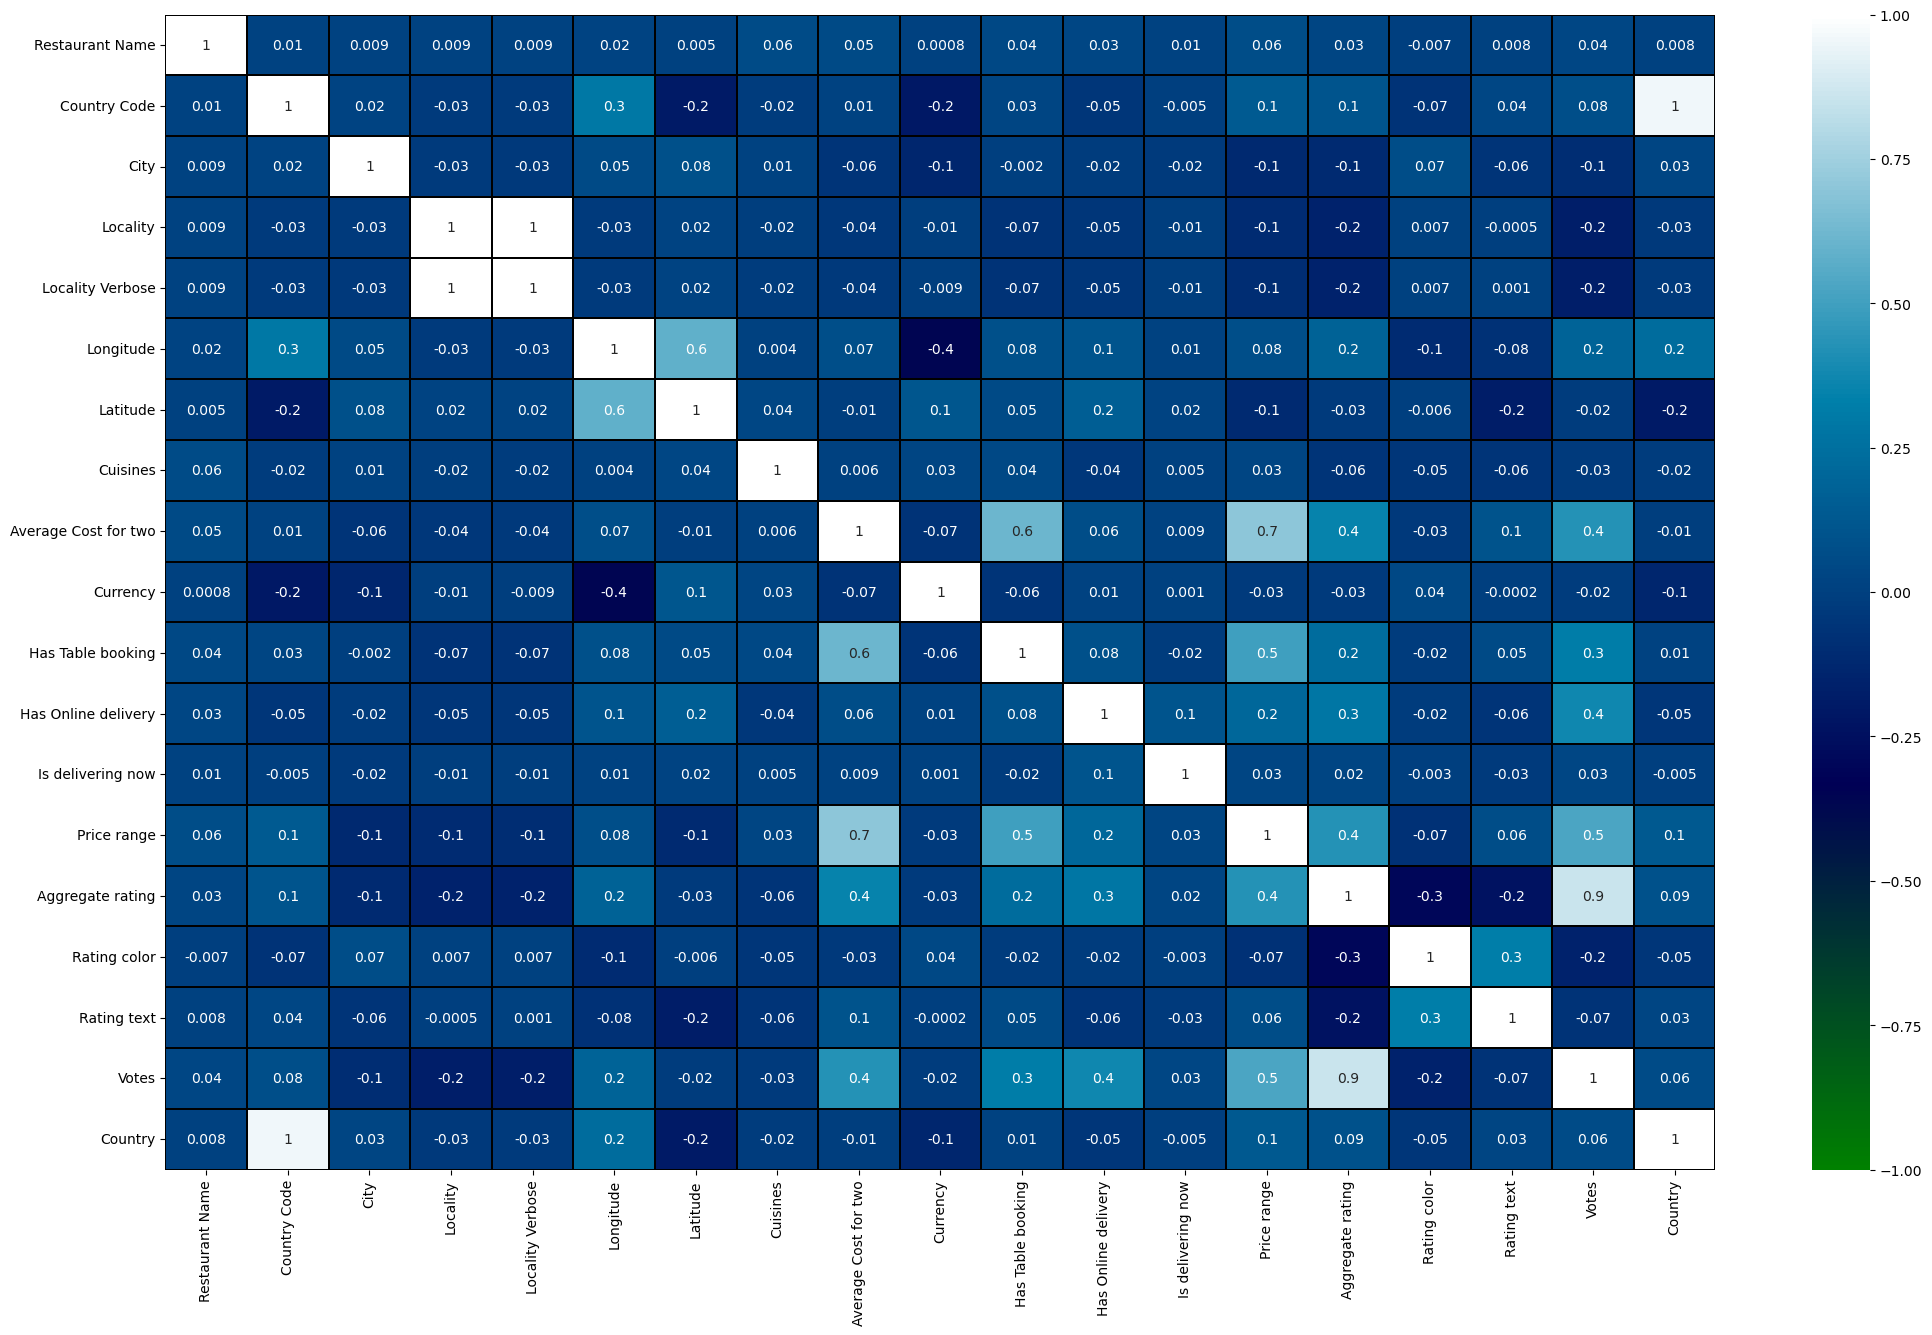

In [105]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="ocean")
plt.yticks(rotation=0)

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation

In [106]:
cor['Average Cost for two'].sort_values(ascending=False)

Average Cost for two    1.000000
Price range             0.699506
Has Table booking       0.617051
Votes                   0.424192
Aggregate rating        0.350264
Rating text             0.095707
Longitude               0.073071
Has Online delivery     0.062763
Restaurant Name         0.051725
Country Code            0.010554
Is delivering now       0.009316
Cuisines                0.006327
Country                -0.012355
Latitude               -0.012364
Rating color           -0.033294
Locality Verbose       -0.038586
Locality               -0.041655
City                   -0.059545
Currency               -0.067872
Name: Average Cost for two, dtype: float64

We can clearly see that Average cost for two is highly corelated with price range, has table booking columns.

### Visualizing the correlation between label and features

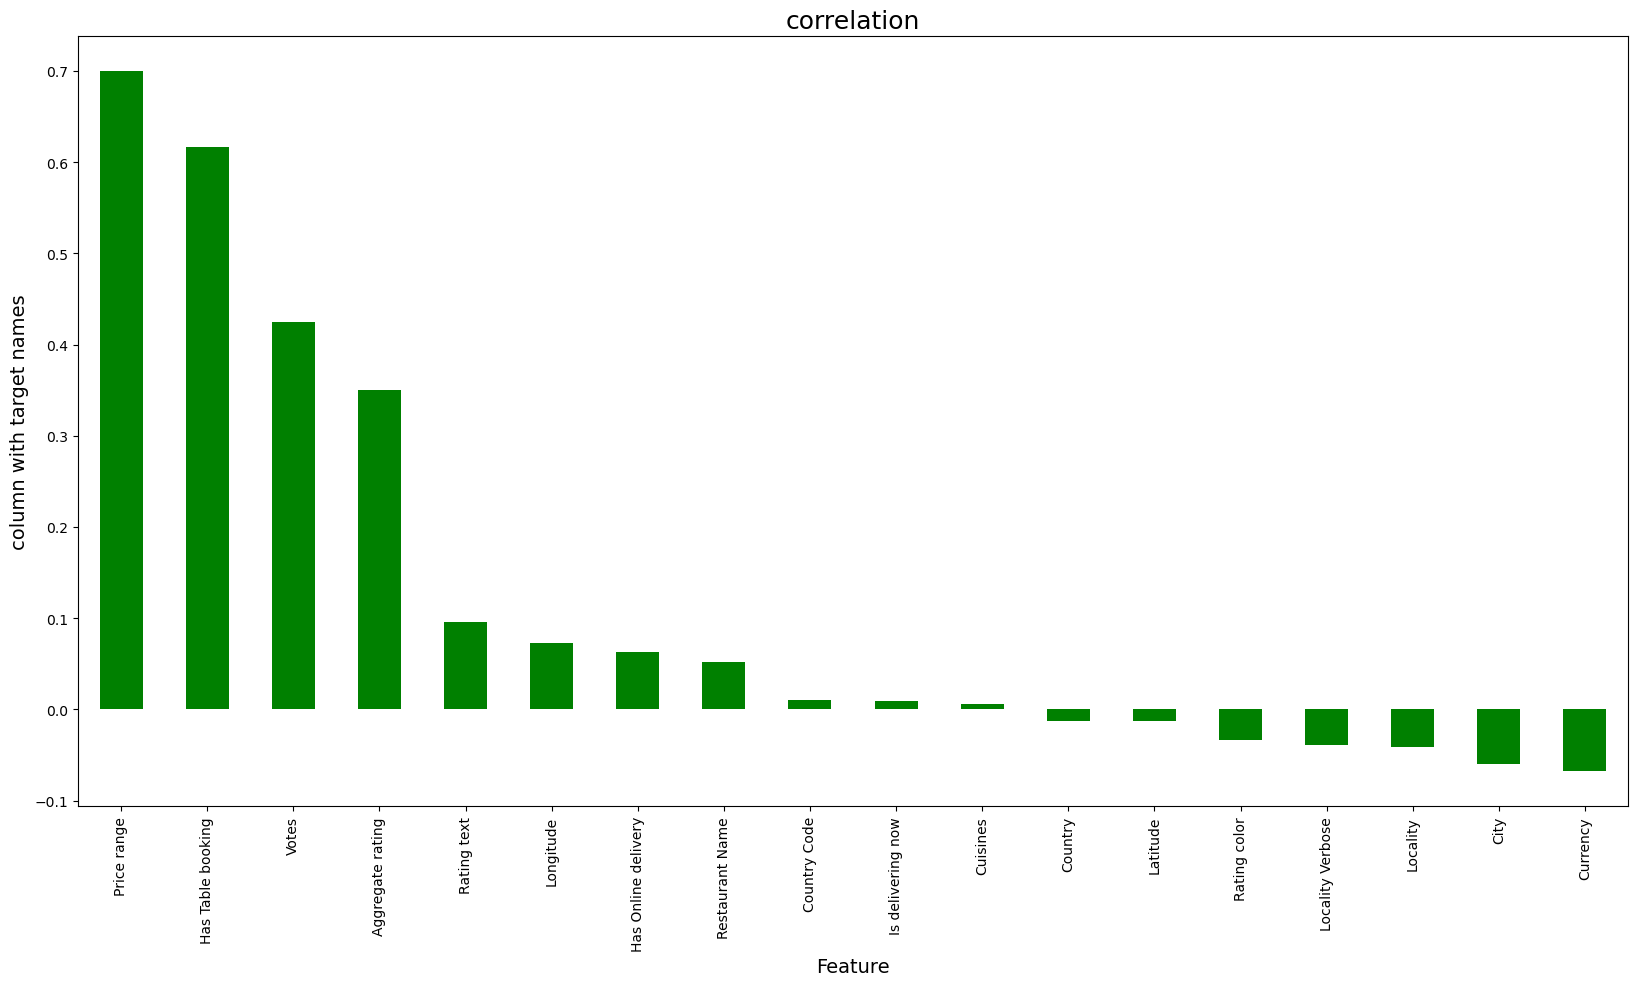

In [107]:
plt.figure(figsize=(20,10))
df_new.corr()['Average Cost for two'].sort_values(ascending=False).drop(['Average Cost for two']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can see the least correlated columns are "Is delivering now" and "Country code" and the max postive and Negative correlated columns as Price Range and Currency.

### Separating Columns into features and label

In [108]:
x = df.drop("Average Cost for two", axis=1)
y = df["Average Cost for two"]

In [109]:
x.shape

(8565, 18)

In [110]:
y.shape

(8565,)

In [111]:
x

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,98,99,7.096817,-2.870154,657,0,1,0,0,1.385129,1.972392,0,1,1.410787,2
1,2794,11.616899,27,376,384,7.094048,-2.870996,783,0,1,0,0,1.385129,1.649065,0,1,1.753948,2
2,2550,11.616899,28,185,191,7.102859,-2.869007,1271,0,1,0,0,1.744844,1.543945,1,5,1.329422,2
3,4150,11.616899,28,549,562,7.102785,-2.868725,794,0,0,0,0,1.744844,2.082799,0,1,1.492117,2
4,4878,11.616899,28,549,562,7.102998,-2.868788,793,0,1,0,0,1.744844,1.972392,0,1,1.240914,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1947,11.616899,13,717,770,-2.075973,-0.937919,552,4,0,0,0,1.744844,1.038603,5,2,1.160268,3
9433,6352,11.616899,13,736,789,-2.075747,-0.929022,718,4,0,0,0,1.744844,1.543945,1,5,0.590036,3
9434,4824,11.616899,13,742,795,-2.076865,-0.953334,1364,4,0,0,0,1.744844,1.440165,1,5,0.634827,3
9435,4253,11.616899,13,759,814,-2.074809,-0.954365,719,4,0,0,0,1.744844,1.649065,0,1,0.996808,3


In [112]:
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9432     200
9433     550
9434     445
9435     400
9436     160
Name: Average Cost for two, Length: 8565, dtype: int64

### Feature Scaling using Standard Scalarization

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.052689,11.616901,-0.498280,-1.603037,-1.570067,7.096817,-2.870154,-0.166259,-13.447769,2.652303,-0.617978,-0.063131,1.385129,1.972392,-2.203028,-0.396310,1.410787,7.570045
1,-0.226145,11.616901,-0.498280,-0.280920,-0.312136,7.094048,-2.870996,0.148814,-13.447769,2.652303,-0.617978,-0.063131,1.385129,1.649065,-2.203028,-0.396310,1.753948,7.570045
2,-0.355245,11.616901,-0.381656,-1.189281,-1.163998,7.102859,-2.869007,1.369094,-13.447769,2.652303,-0.617978,-0.063131,1.744844,1.543945,-1.483690,2.085425,1.329422,7.570045
3,0.491312,11.616901,-0.381656,0.541836,0.473520,7.102785,-2.868725,0.176320,-13.447769,-0.377031,-0.617978,-0.063131,1.744844,2.082799,-2.203028,-0.396310,1.492117,7.570045
4,0.876496,11.616901,-0.381656,0.541836,0.473520,7.102998,-2.868788,0.173820,-13.447769,2.652303,-0.617978,-0.063131,1.744844,1.972392,-2.203028,-0.396310,1.240914,7.570045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,-0.674292,11.616901,-2.131029,1.340813,1.391589,-2.075973,-0.937919,-0.428819,13.483930,-0.377031,-0.617978,-0.063131,1.744844,1.038603,1.393658,0.224124,1.160268,11.396391
8561,1.656387,11.616901,-2.131029,1.431174,1.475451,-2.075747,-0.929022,-0.013724,13.483930,-0.377031,-0.617978,-0.063131,1.744844,1.543945,-1.483690,2.085425,0.590036,11.396391
8562,0.847925,11.616901,-2.131029,1.459708,1.501934,-2.076865,-0.953334,1.601647,13.483930,-0.377031,-0.617978,-0.063131,1.744844,1.440165,-1.483690,2.085425,0.634827,11.396391
8563,0.545809,11.616901,-2.131029,1.540557,1.585796,-2.074809,-0.954365,-0.011223,13.483930,-0.377031,-0.617978,-0.063131,1.744844,1.649065,-2.203028,-0.396310,0.996808,11.396391


We have scaled the data using standard scalarization method to overcome the issue of biasness we have use standard scaler which will convert dataset into mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

### Checking for multicolinearity

In [114]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.009484,Restaurant Name
1,15.328947,Country Code
2,1.079190,City
3,509.013686,Locality
4,508.775821,Locality Verbose
5,3.142886,Longitude
6,2.808150,Latitude
7,1.028686,Cuisines
8,1.525430,Currency
9,1.403791,Has Table booking


Accpetable range for vif value is within 10 if the vif value is greater than 10 then we can say that multicolinearity is present in the dataset here column "Locality", "Locality verbose", "country code", "country" columns have vif value greater than 10 so multicolinearity is present in the dataset to remove this multicolinearity we will remove the column with highest vif value from the dataset and than again check for the vif value till the vif value comes within the accpetable range.

In [115]:
x.drop("Locality",axis=1,inplace=True)

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.009482,Restaurant Name
1,15.328789,Country Code
2,1.072195,City
3,1.038196,Locality Verbose
4,3.141744,Longitude
5,2.807537,Latitude
6,1.028084,Cuisines
7,1.525313,Currency
8,1.403751,Has Table booking
9,1.239733,Has Online delivery


In [117]:
x.drop("Country",axis=1,inplace=True)

In [118]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.009232,Restaurant Name
1,1.459630,Country Code
2,1.068001,City
3,1.038005,Locality Verbose
4,3.077912,Longitude
5,2.783937,Latitude
6,1.027961,Cuisines
7,1.501158,Currency
8,1.396337,Has Table booking
9,1.239732,Has Online delivery


As we can clearly see here that multicolinearity is completely removed from the dataset. Now we can further process with the data.

### Modeling

In [119]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

### Linear Regression

In [120]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.612885746673909
At random state 0,the testing accuracy is :- 0.6259741270960363



At random state 1,the training accuracy is :- 0.6092895803280141
At random state 1,the testing accuracy is :- 0.6444662217112194



At random state 2,the training accuracy is :- 0.6089136727738187
At random state 2,the testing accuracy is :- 0.6397907243193317



At random state 3,the training accuracy is :- 0.6073973062791612
At random state 3,the testing accuracy is :- 0.6521832544480668



At random state 4,the training accuracy is :- 0.6163893838967951
At random state 4,the testing accuracy is :- 0.6107065612041316



At random state 5,the training accuracy is :- 0.6205247161559333
At random state 5,the testing accuracy is :- 0.5977516847469393



At random state 6,the training accuracy is :- 0.6084066832365873
At random state 6,the testing accuracy is :- 0.646621917500745



At random state 7,the training accuracy is :- 0.6108775234505168
At random sta

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [122]:
# train the model
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
accuracy_score=r2_score(y_test,pred_test)
print(accuracy_score)

0.615278446577716


### Cross validation score

In [123]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [124]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 40.42198751733858
Accuracy_score is :- 61.5278446577716


At cv:- 5
Cross validation score is :- 36.352742672529544
Accuracy_score is :- 61.5278446577716


At cv:- 6
Cross validation score is :- 29.733004188145813
Accuracy_score is :- 61.5278446577716


At cv:- 7
Cross validation score is :- 30.901687966099406
Accuracy_score is :- 61.5278446577716


At cv:- 8
Cross validation score is :- 27.39278093466377
Accuracy_score is :- 61.5278446577716


At cv:- 9
Cross validation score is :- 29.446480018165843
Accuracy_score is :- 61.5278446577716




In [125]:
lsscore_selected= cross_val_score(lr,x,y,cv=4).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.40421987517338576 
The accuracy_score is: 0.615278446577716


In [127]:
MAE= metrics.mean_absolute_error(y_test,pred_test)
MSE= metrics.mean_squared_error(y_test,pred_test)
rmse = sqrt(MSE)

In [128]:
print("Errors:-")

print("mean absolute error:",MAE)
print("mean squared error:",MSE)
print("Root Mean Squared Error:",rmse)

Errors:-
mean absolute error: 202.06049549239637
mean squared error: 130284.62468893411
Root Mean Squared Error: 360.9496151666242


In [129]:
print('Difference between Accuracy score and cross validation score is -', abs(accuracy_score - lsscore_selected))

Difference between Accuracy score and cross validation score is - 0.21105857140433026


### Import other Regression models

In [130]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

### DecisionTree Regressor

In [131]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train, y_train)
DTR.score(x_train, y_train)
predDTR=DTR.predict(x_test)

dt=r2_score(y_test, predDTR)
print('R2 Score:', dt*100)

R2 Score: 71.6862753734367


### Cross validation score

In [132]:
for i in range(2, 10):
    cv_score = cross_val_score(DTR, x, y, cv=i)
    cv_mean = cv_score.mean()
    
print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100}")

At cross fold 9, the Cross Val score is 63.01112820326682


In [133]:
dtcvscore=cross_val_score(DTR,x,y,cv=9)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

Cross Val Score: 62.90819340353242


In [134]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predDTR))
print('Mean Squared Error:', mean_squared_error(y_test,predDTR))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predDTR)))

Error:
Mean Absolute Error: 146.69001751313485
Mean Squared Error: 95883.45008756568
Root Mean Square Error: 309.65052896380735


In [135]:
print('Difference between Accuracy score and cross validation score is -',abs(dt - dtcv))

Difference between Accuracy score and cross validation score is - 0.08778081969904283


### K-NeighborsRegressor

In [136]:
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
kn.score(x_train,y_train)
predkn=kn.predict(x_test)

kn_score= r2_score(y_test, predkn)
print('R2 Score:', kn_score*100)

R2 Score: 64.92206153963623


### Cross validation score

In [137]:
for i in range(2, 10):
    cv_score = cross_val_score(kn, x, y, cv=i)
    cv_mean = cv_score.mean()

print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100}")

At cross fold 9, the Cross Val score is 53.24366727919705


In [138]:
kn_cvscore=cross_val_score(kn,x,y, cv=9)
kn_cv_mean=kn_cvscore.mean()
print('Cross val Score :',kn_cv_mean*100)

Cross val Score : 53.24366727919705


In [139]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predkn))
print('Mean Squared Error:', mean_squared_error(y_test,predkn))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predkn)))

Error:
Mean Absolute Error: 176.2521891418564
Mean Squared Error: 118790.22650321074
Root Mean Square Error: 344.65958060557483


In [140]:
print('Difference between Accuracy score and cross validation score is -',abs(kn_score - kn_cv_mean))

Difference between Accuracy score and cross validation score is - 0.11678394260439184


### RandomForestRegressor

In [141]:
RF=RandomForestRegressor()
RF.fit(x_train, y_train)
RF.score(x_train,y_train)
predRF=RF.predict(x_test)

rf_score= r2_score(y_test, predRF)
print('R2 score:', rf_score*100)

R2 score: 85.87651310889929


### Cross validation score

In [142]:
for i in range(2, 10):
    cv_score = cross_val_score(RF, x, y, cv=i)
    cv_mean = cv_score.mean()

print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100}")

At cross fold 9, the Cross Val score is 79.2217950108366


In [143]:
rf_cvscore=cross_val_score(RF,x,y, cv=9)
rf_cv_mean=rf_cvscore.mean()
print('Cross val Score :',rf_cv_mean*100)

Cross val Score : 79.22229694127518


In [144]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predRF))
print('Mean Squared Error:', mean_squared_error(y_test,predRF))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predRF)))

Error:
Mean Absolute Error: 112.93129013426736
Mean Squared Error: 47828.7003298307
Root Mean Square Error: 218.6977373678811


In [145]:
print('Difference between Accuracy score and cross validation score is -',abs(rf_score - rf_cv_mean))

Difference between Accuracy score and cross validation score is - 0.06654216167624116


### GradientBoostingRegressor

In [146]:
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)
gb.score(x_train,y_train)
predgb=gb.predict(x_test)

gb_score= r2_score(y_test, predgb)
print('R2 score:', gb_score*100)

R2 score: 86.90395244578261


### Cross validation score

In [147]:
for i in range(2, 10):
    cv_score = cross_val_score(gb, x, y, cv=i)
    cv_mean = cv_score.mean()

print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100}")


At cross fold 9, the Cross Val score is 76.86659762824529


In [148]:
gb_cvscore=cross_val_score(gb,x,y, cv=9)
gb_cv_mean=gb_cvscore.mean()
print('Cross val Score :',gb_cv_mean*100)

Cross val Score : 77.20762549132415


In [149]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predgb))
print('Mean Squared Error:', mean_squared_error(y_test,predgb))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predgb)))

Error:
Mean Absolute Error: 120.86182787844764
Mean Squared Error: 44349.31251789904
Root Mean Square Error: 210.59276463805455


In [150]:
print('Difference between Accuracy score and cross validation score is -',abs(gb_score - gb_cv_mean))

Difference between Accuracy score and cross validation score is - 0.09696326954458456


### ExtraTreesRegressor

In [151]:
ET=ExtraTreesRegressor()
ET.fit(x_train, y_train)
ET.score(x_train,y_train)
predET=ET.predict(x_test)

ET_score= r2_score(y_test, predET)
print('R2 score:', ET_score*100)

R2 score: 86.84711372198981


### cross validation score

In [152]:
for i in range(2, 10):
    cv_score = cross_val_score(ET, x, y, cv=i)
    cv_mean = cv_score.mean()

print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100}")

At cross fold 9, the Cross Val score is 81.17068945562472


In [154]:
ET_cvscore=cross_val_score(ET,x,y, cv=9)
ET_cv_mean=ET_cvscore.mean()
print('Cross val Score :',ET_cv_mean*100)

Cross val Score : 81.72454096978785


In [155]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,predET))
print('Mean Squared Error:', mean_squared_error(y_test,predET))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,predET)))

Error:
Mean Absolute Error: 113.46666666666667
Mean Squared Error: 44541.79489200234
Root Mean Square Error: 211.04927124252845


In [156]:
print('Difference between Accuracy score and cross validation score is -',abs(ET_score - ET_cv_mean))

Difference between Accuracy score and cross validation score is - 0.05122572752201959


### Selection for the best model

After trying different different regression model we can say that "ExtraTreesRegressor" is the best perfroming model. ExtraTreesRegressor giving us an accuracy of 86.84711372198981 which is highest amnog all the other models & Cross validation score= 81.72454096978785. Difference between Accuracy score and cross validation score is - 0.05122572752201959. which is minimum among all the other regression model. so we select the moel as our best performing model which give us minimum difference between accuracy score and cv score and here ExtraTreesRegressor giving us minimum difference between accuracy score and cv score so we select ExtraTreesRegressor as our final model.

### ExtraTreesRegressor as our final model

### Hyperparameter tuning

In [157]:
from sklearn.model_selection import GridSearchCV

parameter = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
}

In [158]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter, cv=9)

In [159]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [161]:
GCV.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

### Final Model

In [162]:
# Define and train the Extra Trees Classifier
final_model = ExtraTreesRegressor(max_depth=None, min_samples_leaf=4, n_estimators=100, min_samples_split=2)
final_model.fit(x_train, y_train)

# Make predictions
pred = final_model.predict(x_test)

# Calculate and print the r2 score
r2 = r2_score(y_test, pred)
print('R2_score:', r2* 100)

R2_score: 86.72067263096044


**Here we can se that the accuracy is improved by some percentage:**

**Saving Final model**

In [163]:
#Saving the model using .pkl
import joblib
joblib.dump(gb,"Zomato_project.pkl")

['Zomato_project.pkl']

### predicting the save model

In [164]:
#Loading the saved model
load=joblib.load("Zomato_project.pkl")


#Predict

prediction = load.predict(x_test)

prediction

array([ 291.32603136,  789.75766319,  272.22237539, ...,  628.94416596,
        281.12859642, 4007.36805069])

In [165]:
pd.DataFrame([load.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,291.326031,400.0
1,789.757663,800.0
2,272.222375,300.0
3,581.372074,500.0
4,574.756113,600.0
...,...,...
1708,179.573002,100.0
1709,1222.132393,1000.0
1710,628.944166,700.0
1711,281.128596,300.0


**Here we can see that predicted value and original values are almost similiar so we can say that our model is performing well.**

### CASE-2: Lets Predict price range

In [166]:
df

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,98,99,7.096817,-2.870154,657,1100,0,1,0,0,1.385129,1.972392,0,1,1.410787,2
1,2794,11.616899,27,376,384,7.094048,-2.870996,783,1200,0,1,0,0,1.385129,1.649065,0,1,1.753948,2
2,2550,11.616899,28,185,191,7.102859,-2.869007,1271,4000,0,1,0,0,1.744844,1.543945,1,5,1.329422,2
3,4150,11.616899,28,549,562,7.102785,-2.868725,794,1500,0,0,0,0,1.744844,2.082799,0,1,1.492117,2
4,4878,11.616899,28,549,562,7.102998,-2.868788,793,1500,0,1,0,0,1.744844,1.972392,0,1,1.240914,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1947,11.616899,13,717,770,-2.075973,-0.937919,552,200,4,0,0,0,1.744844,1.038603,5,2,1.160268,3
9433,6352,11.616899,13,736,789,-2.075747,-0.929022,718,550,4,0,0,0,1.744844,1.543945,1,5,0.590036,3
9434,4824,11.616899,13,742,795,-2.076865,-0.953334,1364,445,4,0,0,0,1.744844,1.440165,1,5,0.634827,3
9435,4253,11.616899,13,759,814,-2.074809,-0.954365,719,400,4,0,0,0,1.744844,1.649065,0,1,0.996808,3


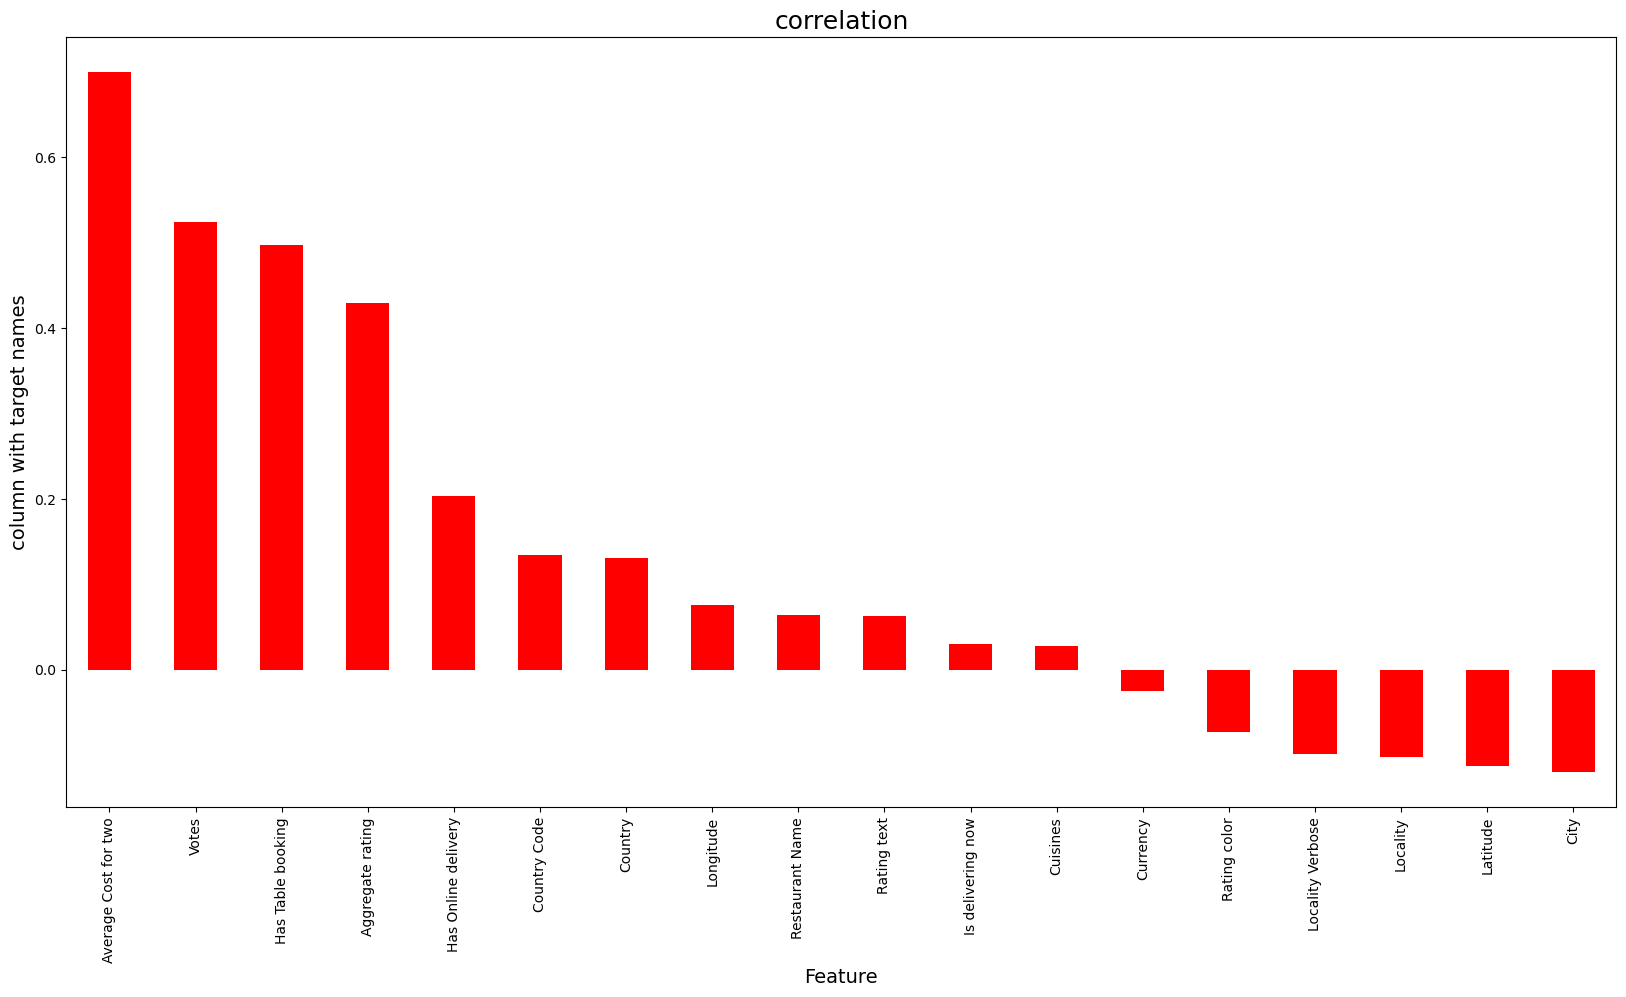

In [167]:
plt.figure(figsize=(20,10))
df_new.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

"price range " is highly positively and negatively corelated with "Average cost for two" & "city" and very less corelated with "currency" and "cuisines"

In [168]:
cor['Price range'].sort_values(ascending=False)

Price range             1.000000
Average Cost for two    0.699506
Votes                   0.523711
Has Table booking       0.496771
Aggregate rating        0.429224
Has Online delivery     0.203256
Country Code            0.134602
Country                 0.130354
Longitude               0.075264
Restaurant Name         0.064012
Rating text             0.062516
Is delivering now       0.030144
Cuisines                0.027467
Currency               -0.025634
Rating color           -0.073294
Locality Verbose       -0.099217
Locality               -0.101930
Latitude               -0.112352
City                   -0.119901
Name: Price range, dtype: float64

In [169]:
# deviding into fetures and target. 
x1=df.drop('Price range', axis=1)
y1=df['Price range']

In [170]:
x1

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,3321,11.616899,27,98,99,7.096817,-2.870154,657,1100,0,1,0,0,1.972392,0,1,1.410787,2
1,2794,11.616899,27,376,384,7.094048,-2.870996,783,1200,0,1,0,0,1.649065,0,1,1.753948,2
2,2550,11.616899,28,185,191,7.102859,-2.869007,1271,4000,0,1,0,0,1.543945,1,5,1.329422,2
3,4150,11.616899,28,549,562,7.102785,-2.868725,794,1500,0,0,0,0,2.082799,0,1,1.492117,2
4,4878,11.616899,28,549,562,7.102998,-2.868788,793,1500,0,1,0,0,1.972392,0,1,1.240914,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9432,1947,11.616899,13,717,770,-2.075973,-0.937919,552,200,4,0,0,0,1.038603,5,2,1.160268,3
9433,6352,11.616899,13,736,789,-2.075747,-0.929022,718,550,4,0,0,0,1.543945,1,5,0.590036,3
9434,4824,11.616899,13,742,795,-2.076865,-0.953334,1364,445,4,0,0,0,1.440165,1,5,0.634827,3
9435,4253,11.616899,13,759,814,-2.074809,-0.954365,719,400,4,0,0,0,1.649065,0,1,0.996808,3


In [171]:
y1

0       1.385129
1       1.385129
2       1.744844
3       1.744844
4       1.744844
          ...   
9432    1.744844
9433    1.744844
9434    1.744844
9435    1.744844
9436    1.744844
Name: Price range, Length: 8565, dtype: float64

In [172]:
x1.shape

(8565, 18)

In [173]:
y1.shape

(8565,)

### Scaling the Features Using StandardScaler

In [174]:
sts=StandardScaler()
x1=sts.fit_transform(x1)

In [175]:
x1

array([[ 0.0526895 , 11.61690066, -0.49828045, ..., -0.39630978,
         1.41078655,  7.57004462],
       [-0.2261454 , 11.61690066, -0.49828045, ..., -0.39630978,
         1.75394824,  7.57004462],
       [-0.35524544, 11.61690066, -0.38165553, ...,  2.0854254 ,
         1.32942197,  7.57004462],
       ...,
       [ 0.84792453, 11.61690066, -2.13102921, ...,  2.0854254 ,
         0.63482701, 11.39639058],
       [ 0.54580929, 11.61690066, -2.13102921, ..., -0.39630978,
         0.99680835, 11.39639058],
       [ 0.81776592, 11.61690066, -2.13102921, ...,  0.22412401,
         0.84555408, 11.39639058]])

### Checking for multicollinearity

In [176]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [185]:
df_col = pd.DataFrame(data=x1, columns=['Restaurant Name', 'Country Code', 'City', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'])

In [186]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(df_col.values, i)
              for i in range(len(df_col.columns))]
vif['Features'] =df_col.columns

vif

,VIF values,Features
0,1.008682,Restaurant Name
1,15.305703,Country Code
2,1.072086,City
3,509.859391,Locality
4,509.770022,Locality Verbose
5,3.133081,Longitude
6,2.762195,Latitude
7,1.026738,Cuisines
8,1.865809,Average Cost for two
9,1.527028,Currency


We can observe that the vif value is greater than 10 in columns "country code", `Locality`, `Locality verbose`, `country`. If vif value is greater than 10 in that we can say that multicolinearity is present in the dataset and we have to remove it. so we will drop the column with highest vif value and than agian check for the multicolinearity.

In [187]:
df_col.drop("Locality",axis=1,inplace=True)

In [188]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(df_col.values, i)
              for i in range(len(df_col.columns))]
vif['Features'] =df_col.columns

vif

,VIF values,Features
0,1.008679,Restaurant Name
1,15.305233,Country Code
2,1.064867,City
3,1.041889,Locality Verbose
4,3.132271,Longitude
5,2.761917,Latitude
6,1.026203,Cuisines
7,1.860705,Average Cost for two
8,1.526776,Currency
9,1.664141,Has Table booking


In [189]:
df_col.drop("Country Code",axis=1,inplace=True)

In [190]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(df_col.values, i)
              for i in range(len(df_col.columns))]
vif['Features'] =df_col.columns

vif

,VIF values,Features
0,1.008496,Restaurant Name
1,1.063359,City
2,1.041794,Locality Verbose
3,2.881327,Longitude
4,2.623662,Latitude
5,1.026170,Cuisines
6,1.860133,Average Cost for two
7,1.516099,Currency
8,1.661363,Has Table booking
9,1.246851,Has Online delivery


Here we can see that the vif value is less than 10 for each colun so we can say that multicolinearity is removed from the data set.

### Model building

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [192]:
### Selection for the best random state

In [193]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Convert continuous target variable into categorical labels
y1 = np.digitize(y1, bins=np.histogram(y1, bins='auto')[1])

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=.30, random_state=i)
    mod = RandomForestClassifier()
    mod.fit(X_train1, y_train1)
    pred = mod.predict(X_test1)
    acc = accuracy_score(y_test1, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.9894941634241246 on Random_state 46


### train test split

In [194]:
X_train1, X_test1, y_train1, y_test1=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

### RandomForestClassifier

In [195]:
RFC=RandomForestClassifier()
RFC.fit(X_train1, y_train1)
predRFC=RFC.predict(X_test1)
print('Accuracy Score:',accuracy_score(y_test1, predRFC))
print('Confusion Matrix:',confusion_matrix(y_test1, predRFC))
print(classification_report(y_test1,predRFC))

Accuracy Score: 0.988715953307393
Confusion Matrix: [[1259    3    0    0]
 [   6  855    1    0]
 [   0    6  319    1]
 [   0    0   12  108]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1262
          11       0.99      0.99      0.99       862
          15       0.96      0.98      0.97       326
          18       0.99      0.90      0.94       120

    accuracy                           0.99      2570
   macro avg       0.98      0.97      0.98      2570
weighted avg       0.99      0.99      0.99      2570



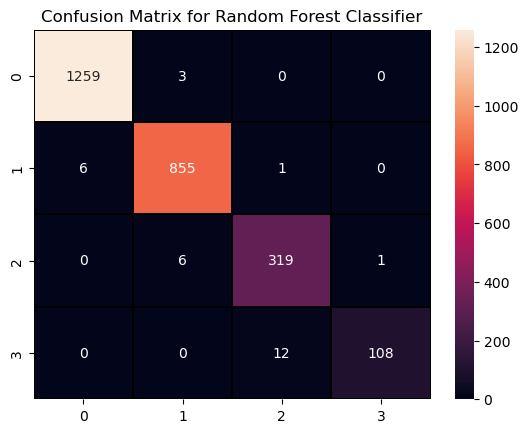

In [196]:
cm = confusion_matrix(y_test1, predRFC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f") 
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [199]:
#using k-fold cross validation for Random Forest classifier 
cvscore=cross_val_score(RFC,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predRFC) - cvscore.mean()))

[0.82603619 0.96380619 0.99883246 1.         0.95271454]
0.9482778750729715
Difference between Accuracy score and cross validation score is - 0.04043807823442158


### KNeighborsClassifier

In [200]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(X_train1,y_train1)
predKNN= KNN.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predKNN))
print('Confusion Matrix', confusion_matrix(y_test1,predKNN))
print('Classification Report', classification_report(y_test1,predKNN))

Accuracy Score 0.7416342412451362
Confusion Matrix [[1101  157    4    0]
 [ 271  542   49    0]
 [  10  115  196    5]
 [   0    3   50   67]]
Classification Report               precision    recall  f1-score   support

           1       0.80      0.87      0.83      1262
          11       0.66      0.63      0.65       862
          15       0.66      0.60      0.63       326
          18       0.93      0.56      0.70       120

    accuracy                           0.74      2570
   macro avg       0.76      0.67      0.70      2570
weighted avg       0.74      0.74      0.74      2570



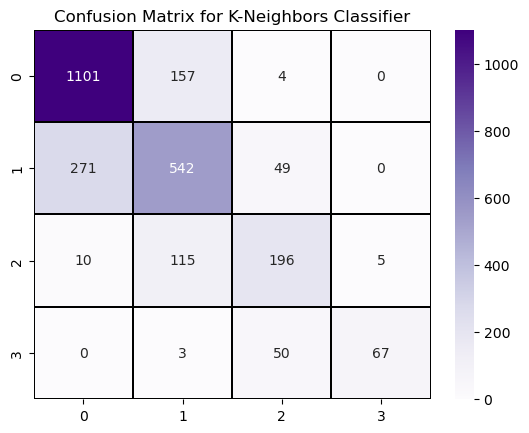

In [201]:
cm = confusion_matrix(y_test1, predKNN)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples") 
plt.title('Confusion Matrix for K-Neighbors Classifier')
plt.show()

In [203]:
#using k-fold cross validation for k-Neighbour classifier 
cvscore=cross_val_score(KNN,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predKNN) - cvscore.mean()))

[0.57034442 0.56042032 0.69118506 0.76298891 0.70052539]
0.657092819614711
Difference between Accuracy score and cross validation score is - 0.08454142163042522


### DecisionTreeClassifier

In [204]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train1, y_train1)
predDTC=DTC.predict(X_test1)
print('Accuracy Score',accuracy_score(y_test1, predDTC))
print('Confusion Matrix',confusion_matrix(y_test1, predDTC))
print('Classification Report',classification_report(y_test1,predDTC))

Accuracy Score 0.9840466926070038
Confusion Matrix [[1255    7    0    0]
 [   3  846   13    0]
 [   0    6  313    7]
 [   0    0    5  115]]
Classification Report               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1262
          11       0.98      0.98      0.98       862
          15       0.95      0.96      0.95       326
          18       0.94      0.96      0.95       120

    accuracy                           0.98      2570
   macro avg       0.97      0.97      0.97      2570
weighted avg       0.98      0.98      0.98      2570



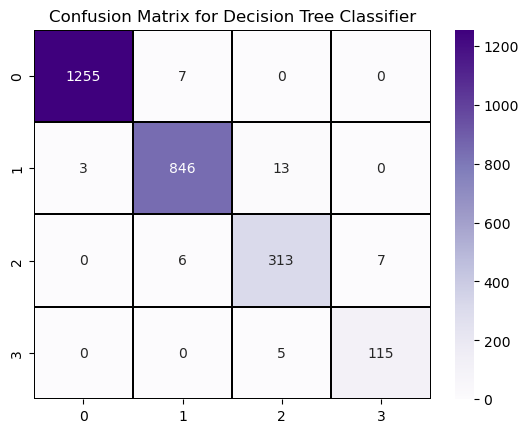

In [205]:
cm = confusion_matrix(y_test1, predDTC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f",  cmap="Purples") 
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [206]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predDTC) - cvscore.mean()))

[0.56567426 0.96030356 0.99941623 0.99883246 0.9352014 ]
0.8918855808523058
Difference between Accuracy score and cross validation score is - 0.09216111175469799


### SupportVectorClassifier

In [207]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(X_train1,y_train1)
predsvc= svc.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predsvc))
print('Confusion Matrix', confusion_matrix(y_test1,predsvc))
print('Classification Report', classification_report(y_test1,predsvc))

Accuracy Score 0.9412451361867704
Confusion Matrix [[1232   30    0    0]
 [  46  803   13    0]
 [   0   33  286    7]
 [   0    0   22   98]]
Classification Report               precision    recall  f1-score   support

           1       0.96      0.98      0.97      1262
          11       0.93      0.93      0.93       862
          15       0.89      0.88      0.88       326
          18       0.93      0.82      0.87       120

    accuracy                           0.94      2570
   macro avg       0.93      0.90      0.91      2570
weighted avg       0.94      0.94      0.94      2570



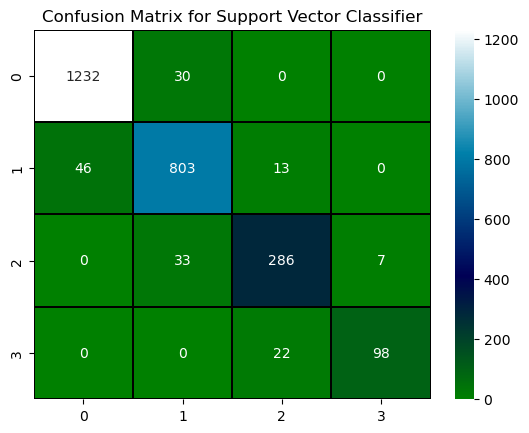

In [208]:
cm = confusion_matrix(y_test1, predsvc)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="ocean") 
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

In [209]:
#using k-fold cross validation for support vector classifier 
cvscore=cross_val_score(svc,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predsvc) - cvscore.mean()))

[0.76065382 0.87157034 0.931115   0.95037945 0.90309399]
0.8833625218914186
Difference between Accuracy score and cross validation score is - 0.0578826142953518


### GradientBoostingClassifier

In [210]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(X_train1,y_train1)
predGB=GB.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predGB))
print('Confusion Matrix', confusion_matrix(y_test1,predGB))
print('Classification Report', classification_report(y_test1,predGB))

Accuracy Score 0.9883268482490273
Confusion Matrix [[1259    3    0    0]
 [   4  857    1    0]
 [   0   12  312    2]
 [   0    0    8  112]]
Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1262
          11       0.98      0.99      0.99       862
          15       0.97      0.96      0.96       326
          18       0.98      0.93      0.96       120

    accuracy                           0.99      2570
   macro avg       0.98      0.97      0.98      2570
weighted avg       0.99      0.99      0.99      2570



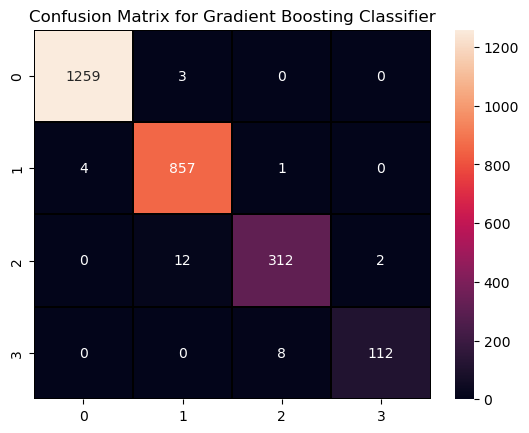

In [211]:
cm = confusion_matrix(y_test1, predGB)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f") 
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [212]:
#using k-fold cross validation for Gradient Boosting classifier 
cvscore=cross_val_score(GB,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predGB) - cvscore.mean()))

[0.56742557 0.95855225 0.99941623 1.         0.96030356]
0.8971395213076473
Difference between Accuracy score and cross validation score is - 0.09118732694137999


### AdaBoostClassifier

In [213]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(X_train1, y_train1)
predABC=ABC.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predABC))
print('Confusion Matrix', confusion_matrix(y_test1,predABC))
print('Classification Report', classification_report(y_test1,predABC))

Accuracy Score 0.8252918287937743
Confusion Matrix [[1262    0    0    0]
 [  17  845    0    0]
 [   0  319    5    2]
 [   0  110    1    9]]
Classification Report               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1262
          11       0.66      0.98      0.79       862
          15       0.83      0.02      0.03       326
          18       0.82      0.07      0.14       120

    accuracy                           0.83      2570
   macro avg       0.83      0.52      0.49      2570
weighted avg       0.85      0.83      0.76      2570



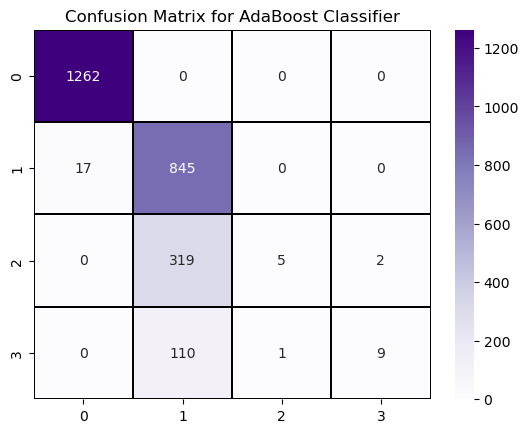

In [214]:
cm = confusion_matrix(y_test1, predABC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f",cmap="Purples" ) 
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [216]:
#using k-fold cross validation for Adaboost classifier 
cvscore=cross_val_score(ABC,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predABC) - cvscore.mean()))

[0.26269702 0.82078225 0.83070636 0.83070636 0.82136602]
0.7132516053706948
Difference between Accuracy score and cross validation score is - 0.11204022342307951


### BaggingClassifier

In [217]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(X_train1,y_train1)
predBC= BC.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predBC))
print('Confusion Matrix', confusion_matrix(y_test1,predBC))
print('Classification Report', classification_report(y_test1,predBC))

Accuracy Score 0.9894941634241246
Confusion Matrix [[1256    6    0    0]
 [   2  856    4    0]
 [   0    5  319    2]
 [   0    0    8  112]]
Classification Report               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1262
          11       0.99      0.99      0.99       862
          15       0.96      0.98      0.97       326
          18       0.98      0.93      0.96       120

    accuracy                           0.99      2570
   macro avg       0.98      0.98      0.98      2570
weighted avg       0.99      0.99      0.99      2570



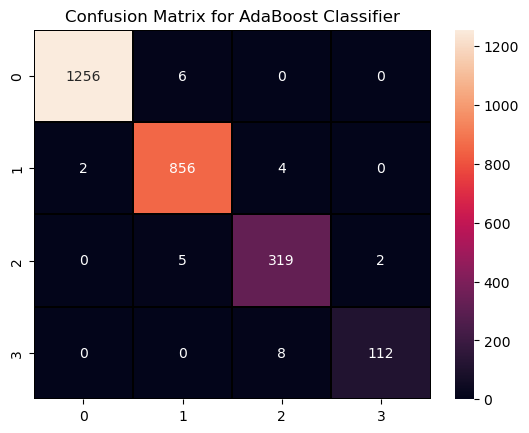

In [218]:
cm = confusion_matrix(y_test1, predBC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f" ) 
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [219]:
#using k-fold cross validation for Bagging classifier 
cvscore=cross_val_score(BC,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predBC) - cvscore.mean()))

[0.56800934 0.9655575  1.         0.99941623 0.96380619]
0.899357851722125
Difference between Accuracy score and cross validation score is - 0.09013631170199954


### ExtraTreesClassifier

In [220]:
#checking accuracy for ExtraTreesclassifier

ET=ExtraTreesClassifier()
ET.fit(X_train1,y_train1)
predET= ET.predict(X_test1)
print('Accuracy Score', accuracy_score(y_test1,predET))
print('Confusion Matrix', confusion_matrix(y_test1,predET))
print('Classification Report', classification_report(y_test1,predET))

Accuracy Score 0.9556420233463035
Confusion Matrix [[1247   15    0    0]
 [  26  820   16    0]
 [   0   28  291    7]
 [   0    0   22   98]]
Classification Report               precision    recall  f1-score   support

           1       0.98      0.99      0.98      1262
          11       0.95      0.95      0.95       862
          15       0.88      0.89      0.89       326
          18       0.93      0.82      0.87       120

    accuracy                           0.96      2570
   macro avg       0.94      0.91      0.92      2570
weighted avg       0.96      0.96      0.96      2570



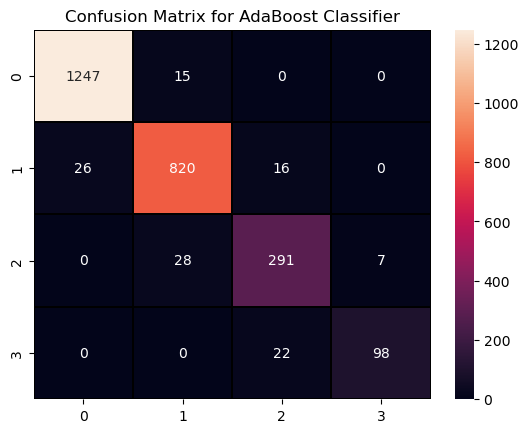

In [221]:
cm = confusion_matrix(y_test1, predET)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f" ) 
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

In [222]:
#using k-fold cross validation for Bagging classifier 
cvscore=cross_val_score(ET,x1,y1,cv=5)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test1,predET) - cvscore.mean()))

[0.5061296  0.81027437 0.91068301 0.95738471 0.91943958]
0.8207822533566842
Difference between Accuracy score and cross validation score is - 0.13485976998961935


### Selection of final model

After trying different different classification model here we reach at the conclusion that SupportVectorClassifier is our final model because when we have applied the SupportVectorClassifier we got an accuracy of 0.9412451361867704 and to over come overfitting and underfitting issue we use cross validation and get cross validation score of 0.8833625218914186 and we find Difference between Accuracy score and cross validation score that is equal to 0.0578826142953518. so we select that model as our final model which has higher accuracy score and higher cross validation score and has lowest difference between between accuracy score and cross validation score. here SupportVectorClassifier fullfills all our requriment so we select SupportVectorClassifier as our final model.

### SupportVectorClassifier as our final model

### Hyperparameter Tuning for SupportVectorClassifier

In [223]:
from sklearn.model_selection import GridSearchCV

parameter = {'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']}

In [224]:
GCV=GridSearchCV(SVC(),parameter, cv=5)

In [225]:
GCV.fit(X_train1,y_train1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [226]:
GCV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

### Final Model

In [227]:
# Define and train the Extra Trees Classifier
final_model = SVC(C=10, gamma='scale', kernel='linear')
final_model.fit(X_train1, y_train1)

# Make predictions
pred = final_model.predict(X_test1)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test1, pred)
print('Accuracy:', accuracy * 100)

Accuracy: 97.43190661478599


### Auc-Roc curve

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [229]:
import numpy as np

# Extract unique classes from the target variable
unique_classes = np.unique(y_train1)

# Get the number of classes
n_classes = len(unique_classes)

# Print the number of classes
print("Number of classes:", n_classes)

Number of classes: 4


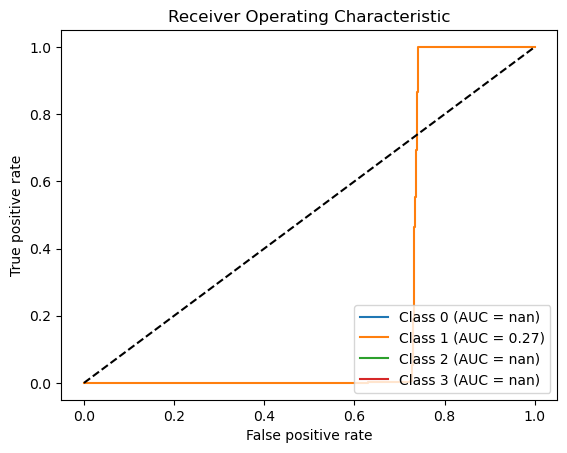

Mean AUC: nan


In [230]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable for each class
y_test1_bin = label_binarize(y_test1, classes=range(n_classes))

# Get predicted probabilities for each class
y_pred_prob = final_model.decision_function(X_test1)

# Calculate ROC curves and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
# Calculate overall AUC
mean_auc = np.mean(list(roc_auc.values()))
print('Mean AUC:', mean_auc)


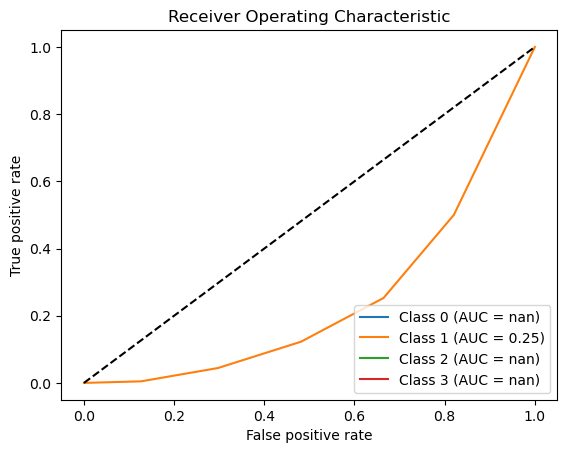

In [231]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

# Create the OvR classifier for KNN
ovr_classifier = OneVsRestClassifier(KNN)

# Fit the classifier on the training data
ovr_classifier.fit(X_train1, y_train1)

# Predict probabilities for each class
y_pred_prob = ovr_classifier.predict_proba(X_test1)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Saving the best model

In [232]:
import joblib

joblib.dump(final_model, 'zomato_project_price_range.pkl')

['zomato_project_price_range.pkl']

### Conclusion

Here we can say that for price range `supportvectorclassifier` is working well